In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score

from warnings import filterwarnings
filterwarnings('ignore')

# Data Preperation

In [4]:
data = pd.read_csv('AccidentLondonBoroughs2223.csv')

In [5]:
data.head().T

0              1  \
Accident_Index                               200501BS00001  200501BS00002   
Location_Easting_OSGR                               525680         524170   
Location_Northing_OSGR                              178240         181650   
Longitude                                         -0.19117      -0.211708   
Latitude                                         51.489096      51.520075   
Police_Force                                             1              1   
Accident_Severity                                        2              3   
Number_of_Vehicles                                       1              1   
Number_of_Casualties                                     1              1   
Date                                            04/01/2005     05/01/2005   
Day_of_Week                                              3              4   
Time                                                 17:42          17:36   
Local_Authority_District                                12             12   
Local_Authority_Highway                          E09000020      E09000020   
1st_Road_Class                                           3              4   
1st_Road_Number                                       3218            450   
Road_Type                                                6              3   
Speed_limit                                             30             30   
Junction_Detail                                          0              6   
Junction_Control                                        -1              2   
2nd_Road_Class                                          -1              5   
2nd_Road_Number                                          0              0   
Pedestrian_Crossing-Human_Control                        0              0   
Pedestrian_Crossing-Physical_Facilities                  1              5   
Light_Conditions                                         1              4   
Weather_Conditions                                       2              1   
Road_Surface_Conditions                                  2              1   
Special_Conditions_at_Site                               0              0   
Carriageway_Hazards                                      0              0   
Urban_or_Rural_Area                                      1              1   
Did_Police_Officer_Attend_Scene_of_Accident              1              1   
LSOA_of_Accident_Location                        E01002849      E01002909   

                                                         2              3  \
Accident_Index                               200501BS00003  200501BS00004   
Location_Easting_OSGR                               524520         526900   
Location_Northing_OSGR                              182240         177530   
Longitude                                        -0.206458      -0.173862   
Latitude                                         51.525301      51.482442   
Police_Force                                             1              1   
Accident_Severity                                        3              3   
Number_of_Vehicles                                       2              1   
Number_of_Casualties                                     1              1   
Date                                            06/01/2005     07/01/2005   
Day_of_Week                                              5              6   
Time                                                 00:15          10:35   
Local_Authority_District                                12             12   
Local_Authority_Highway                          E09000020      E09000020   
1st_Road_Class                                           5              3   
1st_Road_Number                                          0           3220   
Road_Type                                                6              6   
Speed_limit                                             30             30   
Junction_Detail                                     

In [8]:
# checking data shape
data.shape

(145222, 32)

In [10]:
# checking information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145222 entries, 0 to 145221
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               145222 non-null  object 
 1   Location_Easting_OSGR                        145222 non-null  int64  
 2   Location_Northing_OSGR                       145222 non-null  int64  
 3   Longitude                                    145222 non-null  float64
 4   Latitude                                     145222 non-null  float64
 5   Police_Force                                 145222 non-null  int64  
 6   Accident_Severity                            145222 non-null  int64  
 7   Number_of_Vehicles                           145222 non-null  int64  
 8   Number_of_Casualties                         145222 non-null  int64  
 9   Date                                         145222 non-nul

#### Seperating specific Borough Data

In [13]:
data['Local_Authority_Highway'].unique()

array(['E09000020', 'E09000033', 'E09000013', 'E09000001', 'E09000030',
       'E09000028', 'E09000012', 'E09000019', 'E09000007', 'E09000022',
       'E09000005', 'E09000014', 'E09000003', 'E09000009', 'E09000027',
       'E09000031', 'E09000025', 'E09000017', 'E09000015', 'E09000018',
       'E09000010', 'E09000026', 'E09000002', 'E09000016', 'E09000008',
       'E09000032', 'E09000029', 'E09000023', 'E09000006', 'E09000011',
       'E09000004', 'E09000021', 'E09000024'], dtype=object)

In [15]:
# Seperating borough data from Unique ID in local authorithy highway column
borough_data = data.loc[data['Local_Authority_Highway'] == 'E09000028']

In [17]:
print('Filtered data of Herringey Borough')
borough_data.head().T

Filtered data of Herringey Borough


869            2211  \
Accident_Index                               200501CP00132  200501CW11525   
Location_Easting_OSGR                               532770         531440   
Location_Northing_OSGR                              180310         180400   
Longitude                                         -0.08833      -0.107449   
Latitude                                         51.506079      51.507198   
Police_Force                                             1              1   
Accident_Severity                                        3              3   
Number_of_Vehicles                                       2              2   
Number_of_Casualties                                     1              1   
Date                                            30/06/2005     22/08/2005   
Day_of_Week                                              5              2   
Time                                                 16:57          09:10   
Local_Authority_District                                 8              8   
Local_Authority_Highway                          E09000028      E09000028   
1st_Road_Class                                           3              6   
1st_Road_Number                                          3              0   
Road_Type                                                3              6   
Speed_limit                                             30             30   
Junction_Detail                                          9              0   
Junction_Control                                         2             -1   
2nd_Road_Class                                           3             -1   
2nd_Road_Number                                        200              0   
Pedestrian_Crossing-Human_Control                        0              0   
Pedestrian_Crossing-Physical_Facilities                  5              0   
Light_Conditions                                         1              1   
Weather_Conditions                                       2              2   
Road_Surface_Conditions                                  2              2   
Special_Conditions_at_Site                               0              0   
Carriageway_Hazards                                      0              0   
Urban_or_Rural_Area                                      1              1   
Did_Police_Officer_Attend_Scene_of_Accident              1              2   
LSOA_of_Accident_Location                        E01004027      E01003934   

                                                      9895           9899  \
Accident_Index                               200501LX50060  200501LX50065   
Location_Easting_OSGR                               532530         532730   
Location_Northing_OSGR                              176530         172770   
Longitude                                        -0.093204      -0.091736   
Latitude                                         51.472166      51.438329   
Police_Force                                             1              1   
Accident_Severity                                        3              3   
Number_of_Vehicles                                       1              1   
Number_of_Casualties                                     1              1   
Date                                            20/01/2005     25/01/2005   
Day_of_Week                                              5              3   
Time                                                 15:45          18:25   
Local_Authority_District                                 8              8   
Local_Authority_Highway                          E09000028      E09000028   
1st_Road_Class                                           3              3   
1st_Road_Number                                        215           2199   
Road_Type                                                6              6   
Speed_limit                                             30             30   
Junction_Detail                                  

# Exploratory Data Analysis

### Key Questions

1. **When do most accidents occur?**
   - Day of the week
   - Time of day
   - Weather conditions
Does vehicle is involved in Casualtyt rates?**
   - Identifif vehicle can stop any casualtyquencies

3. **What conditions (light, weather, speed) correlate with higher severity?**
   - Light conditions (e.g., daylight, night)
   - Weather conditions (e.g., rain, snow, fog)
   - Speed limits and 

In [21]:
borough_data.shape

(5982, 32)

In [23]:
borough_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5982 entries, 869 to 138128
Data columns (total 32 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Accident_Index                               5982 non-null   object 
 1   Location_Easting_OSGR                        5982 non-null   int64  
 2   Location_Northing_OSGR                       5982 non-null   int64  
 3   Longitude                                    5982 non-null   float64
 4   Latitude                                     5982 non-null   float64
 5   Police_Force                                 5982 non-null   int64  
 6   Accident_Severity                            5982 non-null   int64  
 7   Number_of_Vehicles                           5982 non-null   int64  
 8   Number_of_Casualties                         5982 non-null   int64  
 9   Date                                         5982 non-null   object 
 

In [25]:
# dropping unnecessary columns
borough_data = borough_data.drop(['Accident_Index', 'Local_Authority_Highway'], axis=1)

In [27]:
borough_data.describe().T

count           mean  \
Location_Easting_OSGR                        5982.0  533429.331327   
Location_Northing_OSGR                       5982.0  177558.973587   
Longitude                                    5982.0      -0.079876   
Latitude                                     5982.0      51.481200   
Police_Force                                 5982.0       1.000000   
Accident_Severity                            5982.0       2.853895   
Number_of_Vehicles                           5982.0       1.758609   
Number_of_Casualties                         5982.0       1.142093   
Day_of_Week                                  5982.0       4.136744   
Local_Authority_District                     5982.0       8.000000   
1st_Road_Class                               5982.0       3.602474   
1st_Road_Number                              5982.0     510.963557   
Road_Type                                    5982.0       5.520896   
Speed_limit                                  5982.0      30.023404   
Junction_Detail                              5982.0       2.868773   
Junction_Control                             5982.0       2.373287   
2nd_Road_Class                               5982.0       3.469408   
2nd_Road_Number                              5982.0     222.309763   
Pedestrian_Crossing-Human_Control            5982.0       0.002340   
Pedestrian_Crossing-Physical_Facilities      5982.0       1.500502   
Light_Conditions                             5982.0       1.892009   
Weather_Conditions                           5982.0       1.229355   
Road_Surface_Conditions                      5982.0       1.214142   
Special_Conditions_at_Site                   5982.0       0.045637   
Carriageway_Hazards                          5982.0       0.019057   
Urban_or_Rural_Area                          5982.0       1.000000   
Did_Police_Officer_Attend_Scene_of_Accident  5982.0       1.191073   

                                                     std            min  \
Location_Easting_OSGR                        1116.673614  531300.000000   
Location_Northing_OSGR                       2000.779095  170760.000000   
Longitude                                       0.015887      -0.109897   
Latitude                                        0.018053      51.420035   
Police_Force                                    0.000000       1.000000   
Accident_Severity                               0.371242       1.000000   
Number_of_Vehicles                              0.562649       1.000000   
Number_of_Casualties                            0.519993       1.000000   
Day_of_Week                                     1.916155       1.000000   
Local_Authority_District                        0.000000       8.000000   
1st_Road_Class                                  1.081581       3.000000   
1st_Road_Number                               870.943586       0.000000   
Road_Type                                       1.343328       1.000000   
Speed_limit                                     0.895541      20.000000   
Junction_Detail                                 2.216805       0.000000   
Junction_Control                                2.030920      -1.000000   
2nd_Road_Class                                  2.738686      -1.000000   
2nd_Road_Number                               633.447640       0.000000   
Pedestrian_Crossing-Human_Control               0.065891       0.000000   
Pedestrian_Crossing-Physical_Facilities         2.232270       0.000000   
Light_Conditions                                1.385443       1.000000   
Weather_Conditions                              0.890542       1.000000   
Road_Surface_Conditions                         0.457285      -1.000000   
Special_Conditions_at_Site                      0.448397      -1.000000   
Carriageway_Hazards                             0.299871      -1.000000   
Urban_or_Rural_Area                             0.000000       1.000000   
Did_Police_Officer_Attend_Scene_of_Accident     0.398669    

In [29]:
pd.set_option('display.max_columns', None)
borough_data.head(5).T

869         2211  \
Location_Easting_OSGR                            532770      531440   
Location_Northing_OSGR                           180310      180400   
Longitude                                      -0.08833   -0.107449   
Latitude                                      51.506079   51.507198   
Police_Force                                          1           1   
Accident_Severity                                     3           3   
Number_of_Vehicles                                    2           2   
Number_of_Casualties                                  1           1   
Date                                         30/06/2005  22/08/2005   
Day_of_Week                                           5           2   
Time                                              16:57       09:10   
Local_Authority_District                              8           8   
1st_Road_Class                                        3           6   
1st_Road_Number                                       3           0   
Road_Type                                             3           6   
Speed_limit                                          30          30   
Junction_Detail                                       9           0   
Junction_Control                                      2          -1   
2nd_Road_Class                                        3          -1   
2nd_Road_Number                                     200           0   
Pedestrian_Crossing-Human_Control                     0           0   
Pedestrian_Crossing-Physical_Facilities               5           0   
Light_Conditions                                      1           1   
Weather_Conditions                                    2           2   
Road_Surface_Conditions                               2           2   
Special_Conditions_at_Site                            0           0   
Carriageway_Hazards                                   0           0   
Urban_or_Rural_Area                                   1           1   
Did_Police_Officer_Attend_Scene_of_Accident           1           2   
LSOA_of_Accident_Location                     E01004027   E01003934   

                                                   9895        9899  \
Location_Easting_OSGR                            532530      532730   
Location_Northing_OSGR                           176530      172770   
Longitude                                     -0.093204   -0.091736   
Latitude                                      51.472166   51.438329   
Police_Force                                          1           1   
Accident_Severity                                     3           3   
Number_of_Vehicles                                    1           1   
Number_of_Casualties                                  1           1   
Date                                         20/01/2005  25/01/2005   
Day_of_Week                                           5           3   
Time                                              15:45       18:25   
Local_Authority_District                              8           8   
1st_Road_Class                                        3           3   
1st_Road_Number                                     215        2199   
Road_Type                                             6           6   
Speed_limit                                          30          30   
Junction_Detail                                       0           0   
Junction_Control                                     -1          -1   
2nd_Road_Class                                       -1          -1   
2nd_Road_Number                                       0           0   
Pedestrian_Crossing-Human_Control                     0           0   
Pedestrian_Crossing-Physical_Facilities               0           4   
Light_Conditions                                      1           4   
Weather_Conditions                                    1           2   
Road_Surface_Conditions                               1           2   
Spe

#### Analyzing Accident by Day of the Week

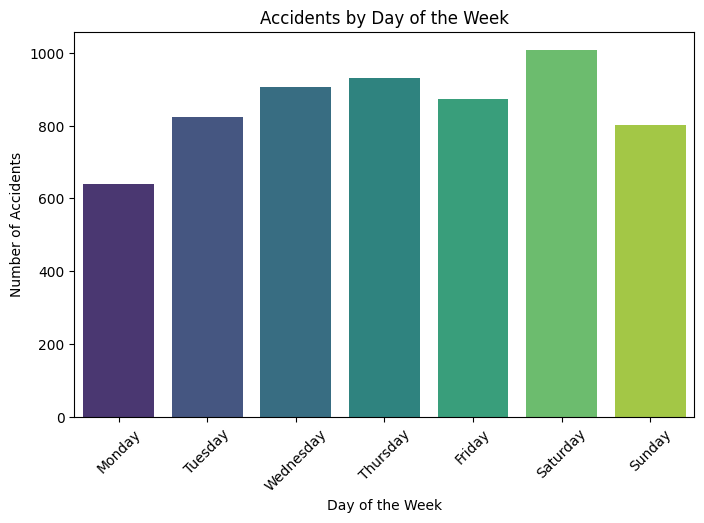

In [32]:
# Step 1: Analyze accidents by Day of the Week
accidents_by_day = borough_data['Day_of_Week'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
sns.barplot(x=accidents_by_day.index, y=accidents_by_day.values, palette='viridis')
plt.title("Accidents by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Accidents")
plt.xticks(ticks=range(0, 7), labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], rotation=45)
plt.show()

The graph displays the number of accidents occurring on each day of the week. Accidents peak on Saturday, followed by Wednesday and Thursday, with Sunday having a slightly lower number. The lowest number of accidents occurs on Monday, indicating weekends and mid-week are the riskiest times for accidents.


### Analyzing Accidents by Time

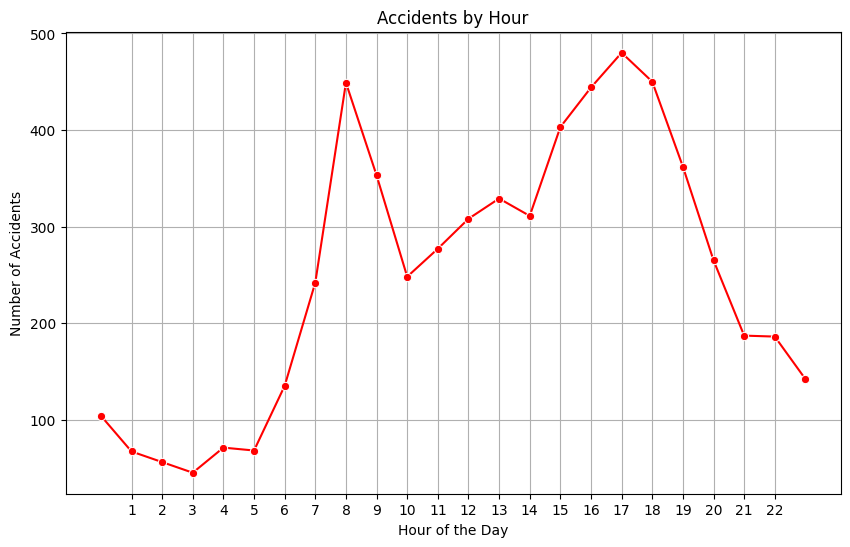

In [36]:
# Analyze accidents by Time (Hourly Distribution)
borough_data['Time'] = pd.to_datetime(borough_data['Time'], format='%H:%M')  # Convert to datetime
# Creating 'Hour' column from 'Time' column
borough_data['Hour'] = borough_data['Time'].dt.hour  # Extracts the hour from the 'Time' column
accidents_by_hour = borough_data['Hour'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=accidents_by_hour.index, y=accidents_by_hour.values, marker="o", color="red")
plt.title("Accidents by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Accidents")
plt.xticks(range(1, 23))
plt.grid()
plt.show()

##### We can see that most of the accidents occour when people goes to offices. Specifically, in office leaving time around 5pm 

### Analyzing Accidents by Time and Date

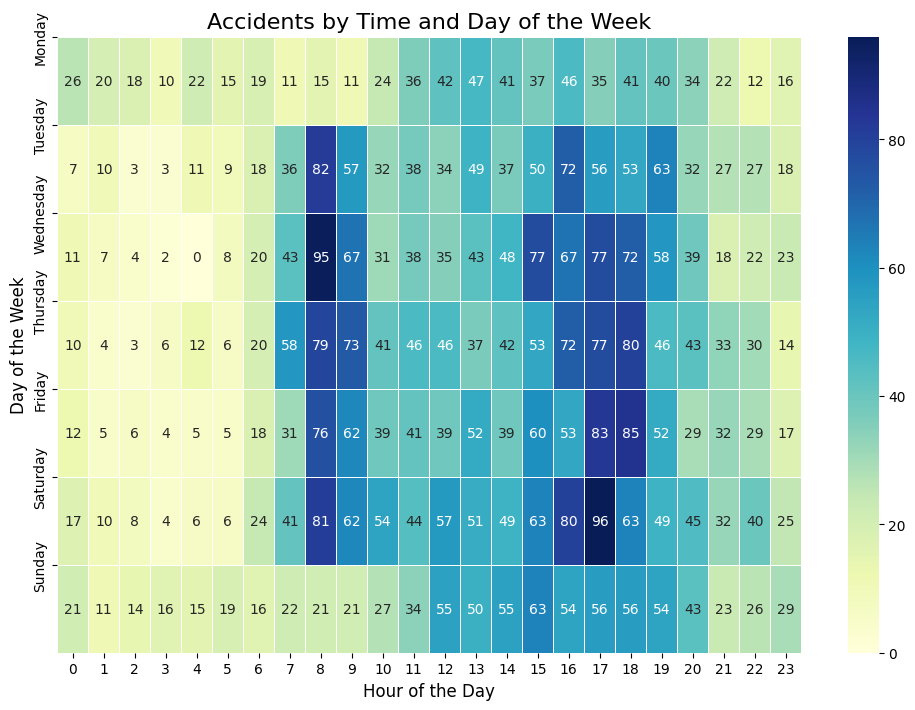

In [40]:
# Aggregating accidents by hour and day of the week
heatmap_data = borough_data.groupby(['Day_of_Week', 'Hour']).size().unstack(fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d", linewidths=0.5)

# Adding titles and labels
plt.title("Accidents by Time and Day of the Week", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Day of the Week", fontsize=12)
plt.yticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.show()

### Analysis of Accidents by Time and Day of the Week

The heatmap illustrates the distribution of accidents across different hours of the day and days of the week.
#
### Key Insights:
1. **Peak Accident Times**:
   - The highest accident rates occur between **7:00–9:00 AM** and **4:00–6:00 PM**, especially on workdays, indicating morning and evening rush hours.

2. **Day with Most Incidents**:
   - Accidents peak on **Wednesday mornings around 8:00 AM** and remain consistently high throughout the day.

3. **Weekend Patterns**:
   - **Saturdays** show an elevated number of accidents in the late afternoon (**3:00–6:00 PM**).  
   - **Sundays** have a more dispersed pattern, with no pronounced peak.

4. **Low Activity Periods**:
   - Accidents are least frequent between **midnight and 6:00 AM** across all days, coinciding with reduced traffic volume.

5. **Weekday Patterns**:
   - Weekdays follow a similar pattern with higher accident frequencies during commuting hours and moderate activity throu#ghout the day.

### Conclusion:
This heatmap emphasizes the need for traffic safety initiatives during morning and evening commute times, particularly midweek, and targeted measures for late afternoon hours on weekends.


### Analyzing weather effect on Accidents

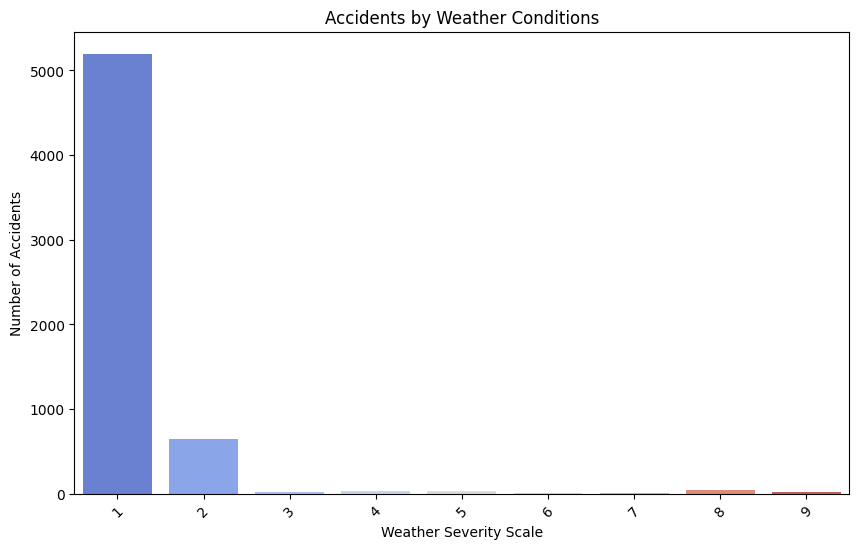

In [44]:
# Step 3: Analyze accidents by Weather Conditions
accidents_by_weather = borough_data['Weather_Conditions'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=accidents_by_weather.index, y=accidents_by_weather.values, palette='coolwarm')
plt.title("Accidents by Weather Conditions")
plt.xlabel("Weather Severity Scale")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

##### It completely unusual to see that most of the accident occour in Fine with no high wind weather showing no big involvement of weather, but it's people's own carelessness

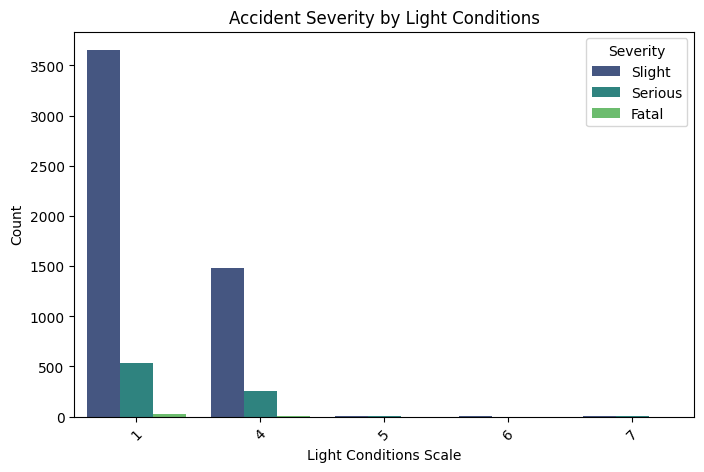

In [46]:
# Visualizing light conditions vs severity

# Create a mapping dictionary
severity_mapping = {1: 'Fatal', 2: 'Serious', 3: 'Slight'}
# Map the severity values to their respective names
borough_data['Severity_Label'] = borough_data['Accident_Severity'].map(severity_mapping)

plt.figure(figsize=(8, 5))
sns.countplot(data=borough_data, x='Light_Conditions', hue='Severity_Label', palette='viridis')
plt.title("Accident Severity by Light Conditions")
plt.xlabel("Light Conditions Scale")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Severity", loc='upper right')
plt.show()

##### Accident Severity by Light Conditions

The chart illustrates the relationship between accident severity and light conditions, showing that most accidents occur under light condition "1" (likely daylight), with "Slight" accidents being the most common, followed by "Serious" and very few "Fatal" cases. As light conditions worsen (higher scale values), the frequency of accidents decreases significantly across all severities.


### Visualizing Weather conditions vs Severity

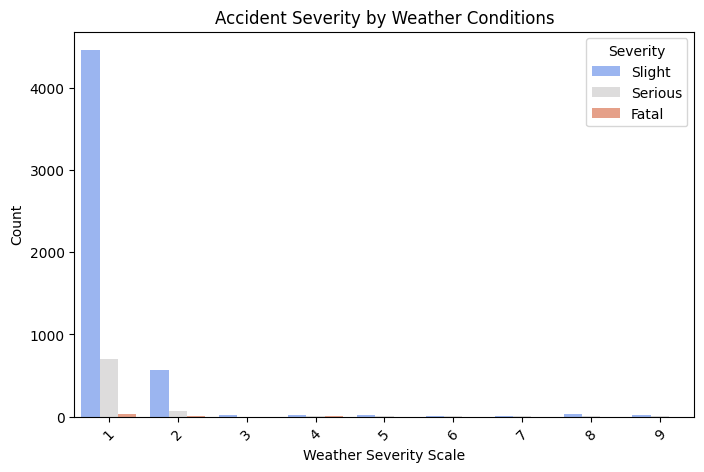

In [51]:
# Visualizing weather conditions vs severity

plt.figure(figsize=(8, 5))
sns.countplot(data=borough_data, x='Weather_Conditions', hue='Severity_Label', palette='coolwarm')
plt.title("Accident Severity by Weather Conditions")
plt.xlabel("Weather Severity Scale")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Severity", loc='upper right')
plt.show()

##### Most of the Accidents occour in Normal weather condition with Slight level of Severity

### Visiulizing Speed limit vs Severity

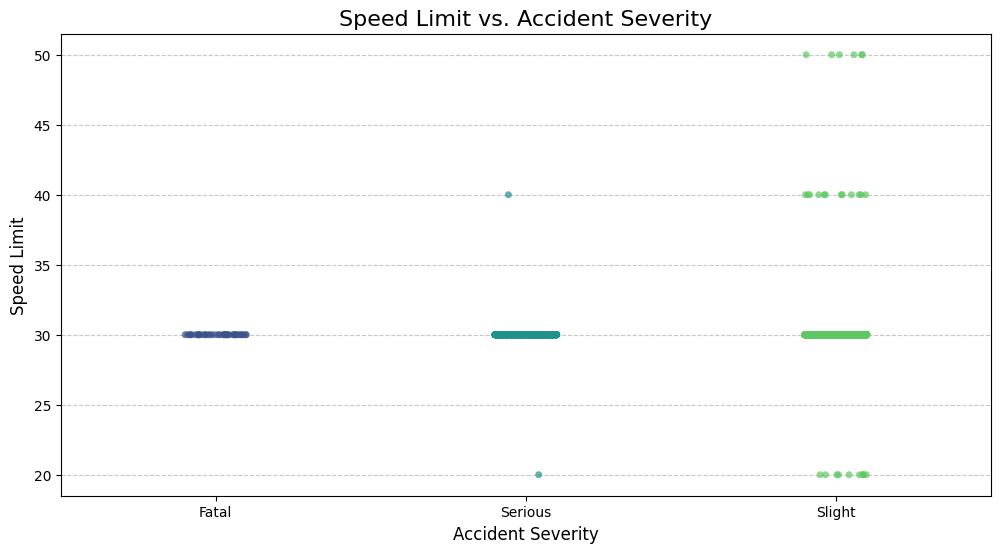

In [55]:
plt.figure(figsize=(12, 6))

# Strip plot for speed limits categorized by accident severity
sns.stripplot(data=borough_data, x='Accident_Severity', y='Speed_limit', palette='viridis', jitter=True, alpha=0.7)

# Adding title and labels
plt.title("Speed Limit vs. Accident Severity", fontsize=16)
plt.xlabel("Accident Severity", fontsize=12)
plt.ylabel("Speed Limit", fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=["Fatal", "Serious", "Slight"])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

##### We can clearly get that most of the accidents have happened on normal speed limit. So we can say that people's are likely to follow the Speed limit rules. 

### Analyzing Vehicle and Casualty involvement

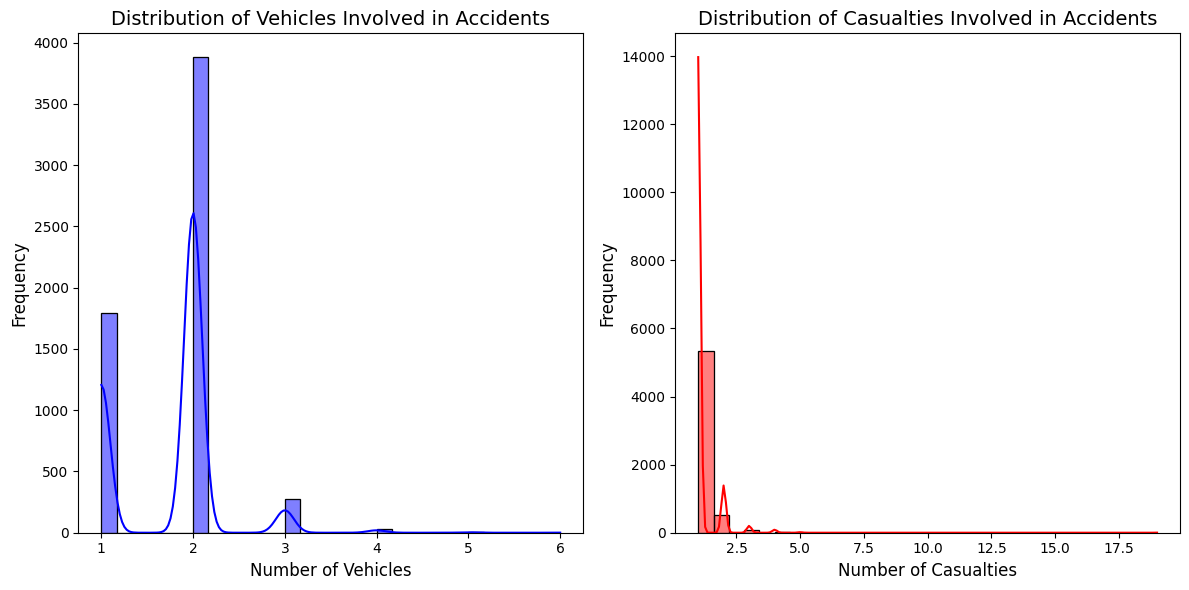

In [59]:
# Plotting the histogram for number of vehicles
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(borough_data['Number_of_Vehicles'], kde=True, color='blue', bins=30)
plt.title('Distribution of Vehicles Involved in Accidents', fontsize=14)
plt.xlabel('Number of Vehicles', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Plotting the histogram for number of casualties
plt.subplot(1, 2, 2)
sns.histplot(borough_data['Number_of_Casualties'], kde=True, color='red', bins=30)
plt.title('Distribution of Casualties Involved in Accidents', fontsize=14)
plt.xlabel('Number of Casualties', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

# Insights from Histograms of Vehicles and Casualties Involved in Accidents

### Vehicles Involved in Accidents:
- The majority of accidents involve **two vehicles**, as indicated by the peak in the histogram at "2."
- Accidents with **one vehicle** are the second most frequent, forming another notable peak.
- Accidents involving three or more vehicles are rare, with the frequency dropping significantly as the number of vehicles increases.

### Casualties Involved in Accidents:
- Most accidents involve **one casualties**, as shown by the steep peak at "1" in the histogram.
- Accidents with **two casualty** follow as the second highest frequency.
- Casualties involving more than two people are much less common, and the frequency declines rapidly as the number increases.

If pie charts were used, they would emphasize the dominance of accidents involving two vehicles and two casualties. However, the histograms reveal the finer details of these distributions.


### Checking Geographical distribution of accidents on a map

In [63]:
# Filtering out rows with missing Latitude or Longitude values
df_clean = borough_data.dropna(subset=['Latitude', 'Longitude'])

# Creating a map centered around the average location of all accidents
map_center = [df_clean['Latitude'].mean(), df_clean['Longitude'].mean()]
accident_map = folium.Map(location=map_center, zoom_start=10)

# Adding markers or heatmap based on Longitude and Latitude
for _, row in df_clean.iterrows():
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']],
                        radius=3,
                        color='red',
                        fill=True,
                        fill_color='red',
                        fill_opacity=0.6).add_to(accident_map)

# Alternatively, adding a heatmap for higher density areas
heat_data = [[row['Latitude'], row['Longitude']] for _, row in df_clean.iterrows()]
HeatMap(heat_data).add_to(accident_map)

# Save the map as an HTML file to view in a browser (optional)
#accident_map.save('accident_geographical_distribution.html')

# Displaying the map in Jupyter Notebook 
accident_map

##### Accident Frequency on Map

- Most of the Accidents occur around Elepheant and Castle Flyover. And this is the clear insight that most of the accidents happen around junctions or the crossovers. Furthermore, it is significant that most of the accidents have happened on service roads instead of main roads, highlighting that the most danger zones are junctions and the service roads.

# Data Preprocessing

In [68]:
borough_data.head(2).T

869   \
Location_Easting_OSGR                                     532770   
Location_Northing_OSGR                                    180310   
Longitude                                               -0.08833   
Latitude                                               51.506079   
Police_Force                                                   1   
Accident_Severity                                              3   
Number_of_Vehicles                                             2   
Number_of_Casualties                                           1   
Date                                                  30/06/2005   
Day_of_Week                                                    5   
Time                                         1900-01-01 16:57:00   
Local_Authority_District                                       8   
1st_Road_Class                                                 3   
1st_Road_Number                                                3   
Road_Type                                                      3   
Speed_limit                                                   30   
Junction_Detail                                                9   
Junction_Control                                               2   
2nd_Road_Class                                                 3   
2nd_Road_Number                                              200   
Pedestrian_Crossing-Human_Control                              0   
Pedestrian_Crossing-Physical_Facilities                        5   
Light_Conditions                                               1   
Weather_Conditions                                             2   
Road_Surface_Conditions                                        2   
Special_Conditions_at_Site                                     0   
Carriageway_Hazards                                            0   
Urban_or_Rural_Area                                            1   
Did_Police_Officer_Attend_Scene_of_Accident                    1   
LSOA_of_Accident_Location                              E01004027   
Hour                                                          16   
Severity_Label                                            Slight   

                                                            2211  
Location_Easting_OSGR                                     531440  
Location_Northing_OSGR                                    180400  
Longitude                                              -0.107449  
Latitude                                               51.507198  
Police_Force                                                   1  
Accident_Severity                                              3  
Number_of_Vehicles                                             2  
Number_of_Casualties                                           1  
Date                                                  22/08/2005  
Day_of_Week                                                    2  
Time                                         1900-01-01 09:10:00  
Local_Authority_District                                       8  
1st_Road_Class                                                 6  
1st_Road_Number                                                0  
Road_Type                                                      6  
Speed_limit                                                   30  
Junction_Detail                                                0  
Junction_Control                                              -1  
2nd_Road_Class                                                -1  
2nd_Road_Number                                                0  
Pedestrian_Crossing-Human_Control                              0  
Pedestrian_Crossing-Physical_Facilities                        0  
Light_Conditions                                               1  
Weather_Conditions                                             2  
Road_Surface_Conditions                                        2  
Special_Conditions_at_Site                                     0  
Carria

In [70]:
borough_data.dtypes

Location_Easting_OSGR                                   int64
Location_Northing_OSGR                                  int64
Longitude                                             float64
Latitude                                              float64
Police_Force                                            int64
Accident_Severity                                       int64
Number_of_Vehicles                                      int64
Number_of_Casualties                                    int64
Date                                                   object
Day_of_Week                                             int64
Time                                           datetime64[ns]
Local_Authority_District                                int64
1st_Road_Class                                          int64
1st_Road_Number                                         int64
Road_Type                                               int64
Speed_limit                                             int64
Junction

Converting Date column from object type to Date type in order of use it as time series

In [73]:
# converting Date column from object type to Date type
borough_data['Date'] = pd.to_datetime(borough_data['Date'], dayfirst = True)

In [75]:
# Creating 'Month' column from 'Date' column
borough_data['Month'] = borough_data['Date'].dt.month  # Extracts the month from the 'Date' column

In [77]:
borough_data.head(2).T

869   \
Location_Easting_OSGR                                     532770   
Location_Northing_OSGR                                    180310   
Longitude                                               -0.08833   
Latitude                                               51.506079   
Police_Force                                                   1   
Accident_Severity                                              3   
Number_of_Vehicles                                             2   
Number_of_Casualties                                           1   
Date                                         2005-06-30 00:00:00   
Day_of_Week                                                    5   
Time                                         1900-01-01 16:57:00   
Local_Authority_District                                       8   
1st_Road_Class                                                 3   
1st_Road_Number                                                3   
Road_Type                                                      3   
Speed_limit                                                   30   
Junction_Detail                                                9   
Junction_Control                                               2   
2nd_Road_Class                                                 3   
2nd_Road_Number                                              200   
Pedestrian_Crossing-Human_Control                              0   
Pedestrian_Crossing-Physical_Facilities                        5   
Light_Conditions                                               1   
Weather_Conditions                                             2   
Road_Surface_Conditions                                        2   
Special_Conditions_at_Site                                     0   
Carriageway_Hazards                                            0   
Urban_or_Rural_Area                                            1   
Did_Police_Officer_Attend_Scene_of_Accident                    1   
LSOA_of_Accident_Location                              E01004027   
Hour                                                          16   
Severity_Label                                            Slight   
Month                                                          6   

                                                            2211  
Location_Easting_OSGR                                     531440  
Location_Northing_OSGR                                    180400  
Longitude                                              -0.107449  
Latitude                                               51.507198  
Police_Force                                                   1  
Accident_Severity                                              3  
Number_of_Vehicles                                             2  
Number_of_Casualties                                           1  
Date                                         2005-08-22 00:00:00  
Day_of_Week                                                    2  
Time                                         1900-01-01 09:10:00  
Local_Authority_District                                       8  
1st_Road_Class                                                 6  
1st_Road_Number                                                0  
Road_Type                                                      6  
Speed_limit                                                   30  
Junction_Detail                                                0  
Junction_Control                                              -1  
2nd_Road_Class                                                -1  
2nd_Road_Number                                                0  
Pedestrian_Crossing-Human_Control                              0  
Pedestrian_Crossing-Physical_Facilities                        0  
Light_Conditions                                               1  
Weather_Conditions                                             2  
Road_Surface_Conditions                                        2  
Speci

### Statistical Summary of Data

In [80]:
# checking Statistical summary of the numeric columns
borough_data.describe().T

count           mean  \
Location_Easting_OSGR                        5982.0  533429.331327   
Location_Northing_OSGR                       5982.0  177558.973587   
Longitude                                    5982.0      -0.079876   
Latitude                                     5982.0      51.481200   
Police_Force                                 5982.0       1.000000   
Accident_Severity                            5982.0       2.853895   
Number_of_Vehicles                           5982.0       1.758609   
Number_of_Casualties                         5982.0       1.142093   
Day_of_Week                                  5982.0       4.136744   
Local_Authority_District                     5982.0       8.000000   
1st_Road_Class                               5982.0       3.602474   
1st_Road_Number                              5982.0     510.963557   
Road_Type                                    5982.0       5.520896   
Speed_limit                                  5982.0      30.023404   
Junction_Detail                              5982.0       2.868773   
Junction_Control                             5982.0       2.373287   
2nd_Road_Class                               5982.0       3.469408   
2nd_Road_Number                              5982.0     222.309763   
Pedestrian_Crossing-Human_Control            5982.0       0.002340   
Pedestrian_Crossing-Physical_Facilities      5982.0       1.500502   
Light_Conditions                             5982.0       1.892009   
Weather_Conditions                           5982.0       1.229355   
Road_Surface_Conditions                      5982.0       1.214142   
Special_Conditions_at_Site                   5982.0       0.045637   
Carriageway_Hazards                          5982.0       0.019057   
Urban_or_Rural_Area                          5982.0       1.000000   
Did_Police_Officer_Attend_Scene_of_Accident  5982.0       1.191073   
Hour                                         5982.0      13.530090   
Month                                        5982.0       6.709295   

                                                     std            min  \
Location_Easting_OSGR                        1116.673614  531300.000000   
Location_Northing_OSGR                       2000.779095  170760.000000   
Longitude                                       0.015887      -0.109897   
Latitude                                        0.018053      51.420035   
Police_Force                                    0.000000       1.000000   
Accident_Severity                               0.371242       1.000000   
Number_of_Vehicles                              0.562649       1.000000   
Number_of_Casualties                            0.519993       1.000000   
Day_of_Week                                     1.916155       1.000000   
Local_Authority_District                        0.000000       8.000000   
1st_Road_Class                                  1.081581       3.000000   
1st_Road_Number                               870.943586       0.000000   
Road_Type                                       1.343328       1.000000   
Speed_limit                                     0.895541      20.000000   
Junction_Detail                                 2.216805       0.000000   
Junction_Control                                2.030920      -1.000000   
2nd_Road_Class                                  2.738686      -1.000000   
2nd_Road_Number                               633.447640       0.000000   
Pedestrian_Crossing-Human_Control               0.065891       0.000000   
Pedestrian_Crossing-Physical_Facilities         2.232270       0.000000   
Light_Conditions                                1.385443       1.000000   
Weather_Conditions                              0.890542       1.000000   
Road_Surface_Conditions                         0.457285      -1.000000   
Special_Conditions_at_Site                      0.448397      -1.000000   
Carriageway_Hazards                             0.299871      -1.00000

The dataset summarizes various accident-related features, including geographic locations, accident severity, timing, and road conditions. Geographic data shows low variability, indicating accidents occur within a concentrated region. Most accidents involve one or two vehicles and result in a single casualty, with occasional outliers. Accident severity is predominantly minor, and incidents are evenly distributed across different days and times, reflecting consistent patterns.

In [83]:
# checking Statistical summary of object type columns
borough_data.describe(include=['object'])

LSOA_of_Accident_Location Severity_Label
count                       5972           5982
unique                       188              3
top                    E01004067         Slight
freq                         185           5147

### Dealing with Null values

Replacing all occurrences of -1 with NaN because it represent Null or missing values in the data

In [87]:
# Replacing all occurrences of -1 with NaN 
borough_data.replace(-1, np.nan, inplace=True)

In [89]:
# number of missing values in each column
borough_data.isna().sum()

Location_Easting_OSGR                             0
Location_Northing_OSGR                            0
Longitude                                         0
Latitude                                          0
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                              0
Local_Authority_District                          0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Control                               1402
2nd_Road_Class                                 1402
2nd_Road_Num

In [91]:
# checking percentage of missing values in each column
missing_values = borough_data.isnull().sum()
print(missing_values / len(borough_data)  * 100)

Location_Easting_OSGR                           0.000000
Location_Northing_OSGR                          0.000000
Longitude                                       0.000000
Latitude                                        0.000000
Police_Force                                    0.000000
Accident_Severity                               0.000000
Number_of_Vehicles                              0.000000
Number_of_Casualties                            0.000000
Date                                            0.000000
Day_of_Week                                     0.000000
Time                                            0.000000
Local_Authority_District                        0.000000
1st_Road_Class                                  0.000000
1st_Road_Number                                 0.000000
Road_Type                                       0.000000
Speed_limit                                     0.000000
Junction_Detail                                 0.000000
Junction_Control               

Since Junction_Control and 2nd_Road_class has so many missing vlaues, we dicided to drop these columns

In [94]:
borough_data = borough_data.drop(['Junction_Control', '2nd_Road_Class'], axis=1)

Filling LSOA_of_Accident_Location columns with its mode value

In [97]:
# Filling LSOA_of_Accident_Location columns with its most frequent values

borough_data['LSOA_of_Accident_Location'] = borough_data['LSOA_of_Accident_Location'].fillna(borough_data['LSOA_of_Accident_Location'].mode)

In [99]:
# filling the remaining 3 columns with thier avarage values as they are float type

borough_data['2nd_Road_Number'] = borough_data['2nd_Road_Number'].fillna(borough_data['2nd_Road_Number'].mean())
borough_data['Road_Surface_Conditions'] = borough_data['Road_Surface_Conditions'].fillna(borough_data['Road_Surface_Conditions'].mean())
borough_data['Carriageway_Hazards'] = borough_data['Carriageway_Hazards'].fillna(borough_data['Carriageway_Hazards'].mean())

In [101]:
# checking if values are successfully imputed
borough_data.isna().sum()

Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_District                       0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
2nd_Road_Number                                0
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-Physical_Facilities        0
Light_Conditions    

### Checking Distributions of Numeric Columns

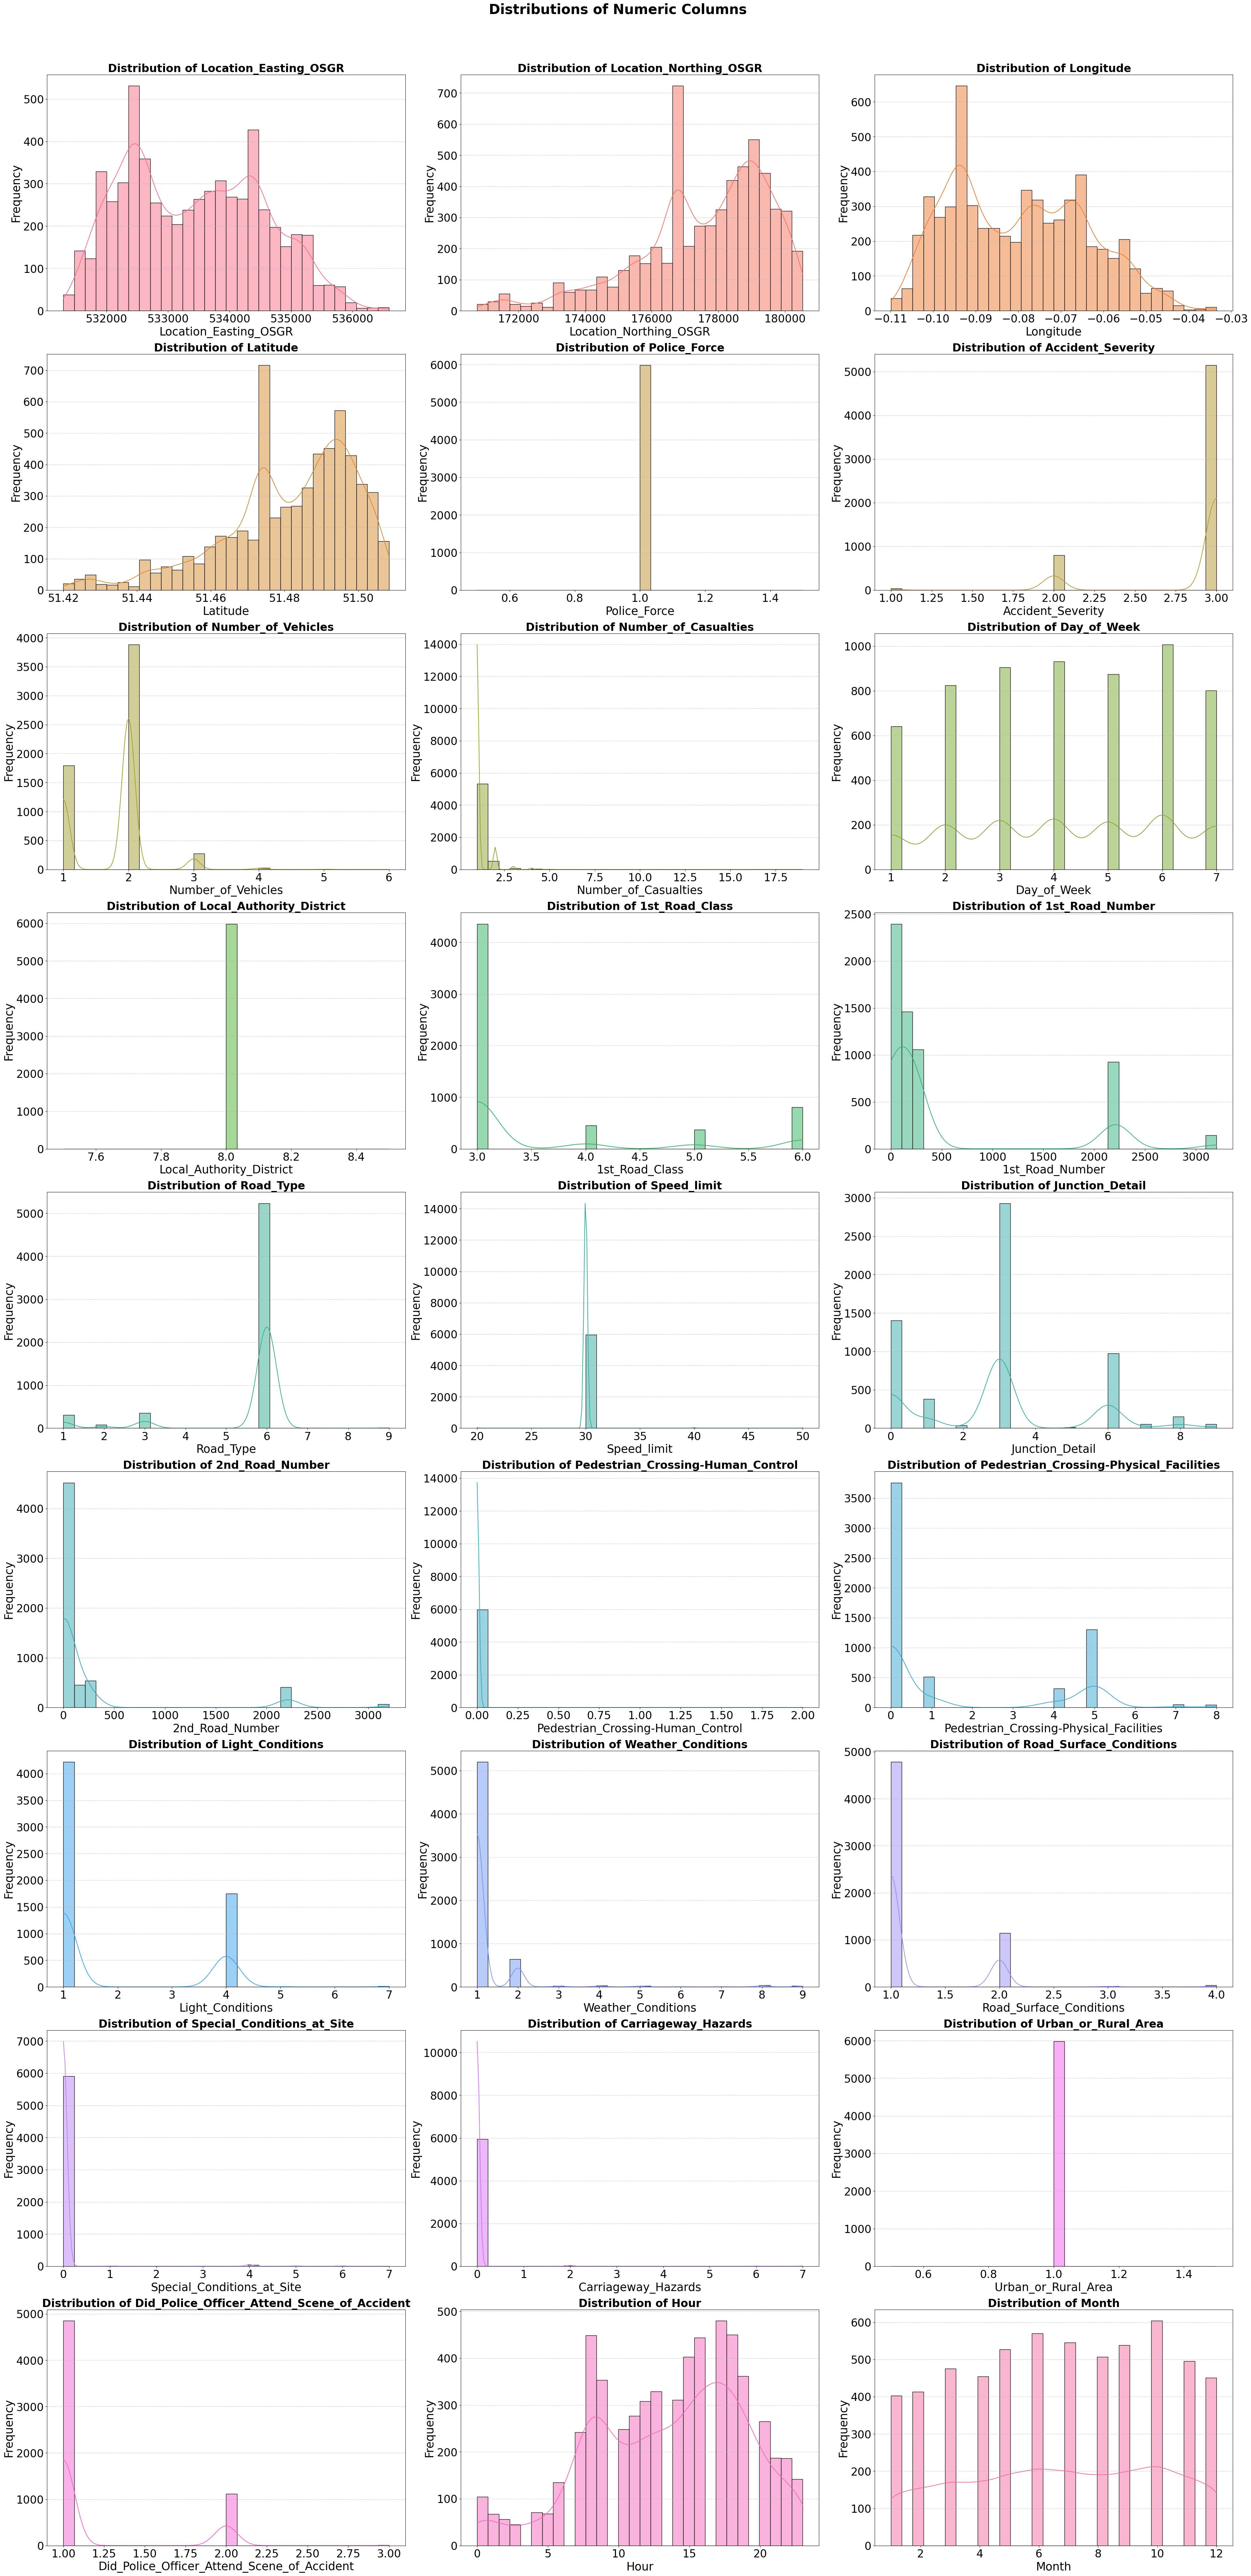

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identifying numeric columns
numeric_columns = borough_data.select_dtypes(include=['number', 'float']).columns

# Define a color palette
palette = sns.color_palette("husl", len(numeric_columns))

# Plot distributions for numeric columns
plt.figure(figsize=(38, 85))
for i, (column, color) in enumerate(zip(numeric_columns, palette), 1):
    plt.subplot((len(numeric_columns) // 3) + 1, 3, i) 
    sns.histplot(
        borough_data[column],
        kde=True,
        color=color,
        bins=30,
        edgecolor='black'
    )
    plt.title(f'Distribution of {column}', fontsize=24, weight='bold') 
    plt.xlabel(column, fontsize=25) 
    plt.ylabel('Frequency', fontsize=25) 
    plt.tick_params(axis='both', which='major', labelsize=24) 
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and aesthetics
plt.tight_layout()
plt.suptitle('Distributions of Numeric Columns', fontsize=30, weight='bold', y=1.02) 
plt.show()

In [114]:
from scipy.stats import skew

# Calculating and displaying Skewness of each numeric column

skewness = borough_data[numeric_columns].apply(skew)

print("\nSkewness for numeric columns:")
print(skewness)


Skewness for numeric columns:
Location_Easting_OSGR                           0.221811
Location_Northing_OSGR                         -0.949239
Longitude                                       0.273100
Latitude                                       -0.938640
Police_Force                                         NaN
Accident_Severity                              -2.379283
Number_of_Vehicles                              0.342936
Number_of_Casualties                           10.752446
Day_of_Week                                    -0.077100
Local_Authority_District                             NaN
1st_Road_Class                                  1.475631
1st_Road_Number                                 1.758531
Road_Type                                      -2.506654
Speed_limit                                    11.562197
Junction_Detail                                 0.472251
2nd_Road_Number                                 3.191115
Pedestrian_Crossing-Human_Control              29.118399


### Skewness Report Summary

The skewness report indicates that most numeric features exhibit mild to moderate skewness, with some exceptions. Variables like the number of casualties, speed limits, and pedestrian crossing controls show extreme positive skewness, indicating a concentration of lower values with rare higher outliers. Features like accident severity and road type demonstrate negative skewness, reflecting a concentration of higher values. Overall, the data includes a mix of normal and highly skewed distributions, requiring potential transformations for analysis.
ls.


### Checking Distribution of Categorical columns

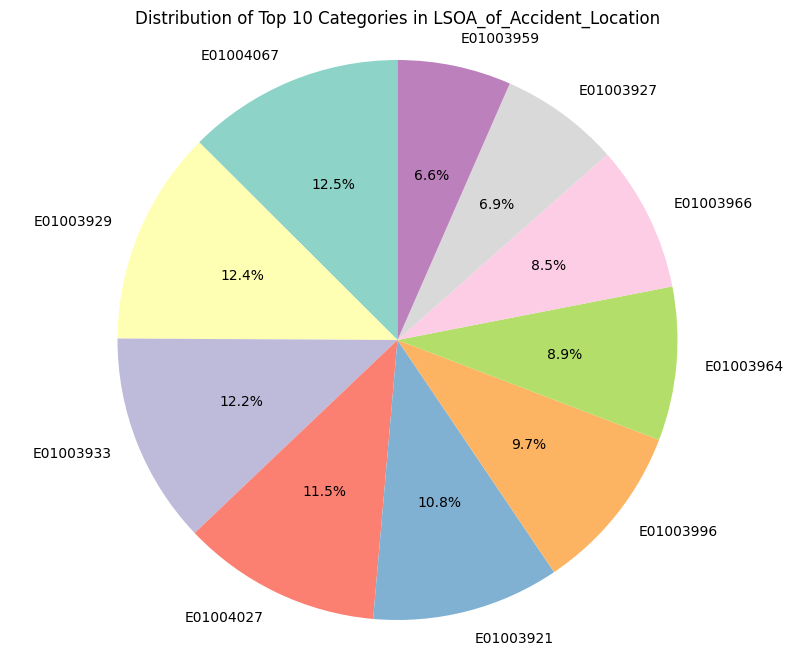

In [118]:
# Identifying the categorical column 
categorical_column = borough_data.select_dtypes(include=['object']).columns[0]

# Getting the value counts of the categorical column and sort them
value_counts = borough_data[categorical_column].value_counts()

# Keeping only the top 10 values
top_10 = value_counts.head(10)

# Plotting the pie chart for the top 10 categories
plt.figure(figsize=(10, 8))
plt.pie(top_10, labels=top_10.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(top_10)))
plt.title(f'Distribution of Top 10 Categories in {categorical_column}')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular

# Show the pie chart
plt.show()

In [120]:
len(borough_data['LSOA_of_Accident_Location'].unique())

189

##### As there were so many missing values that's why we showed the distribution of top 10 values

### Detecting Outliers

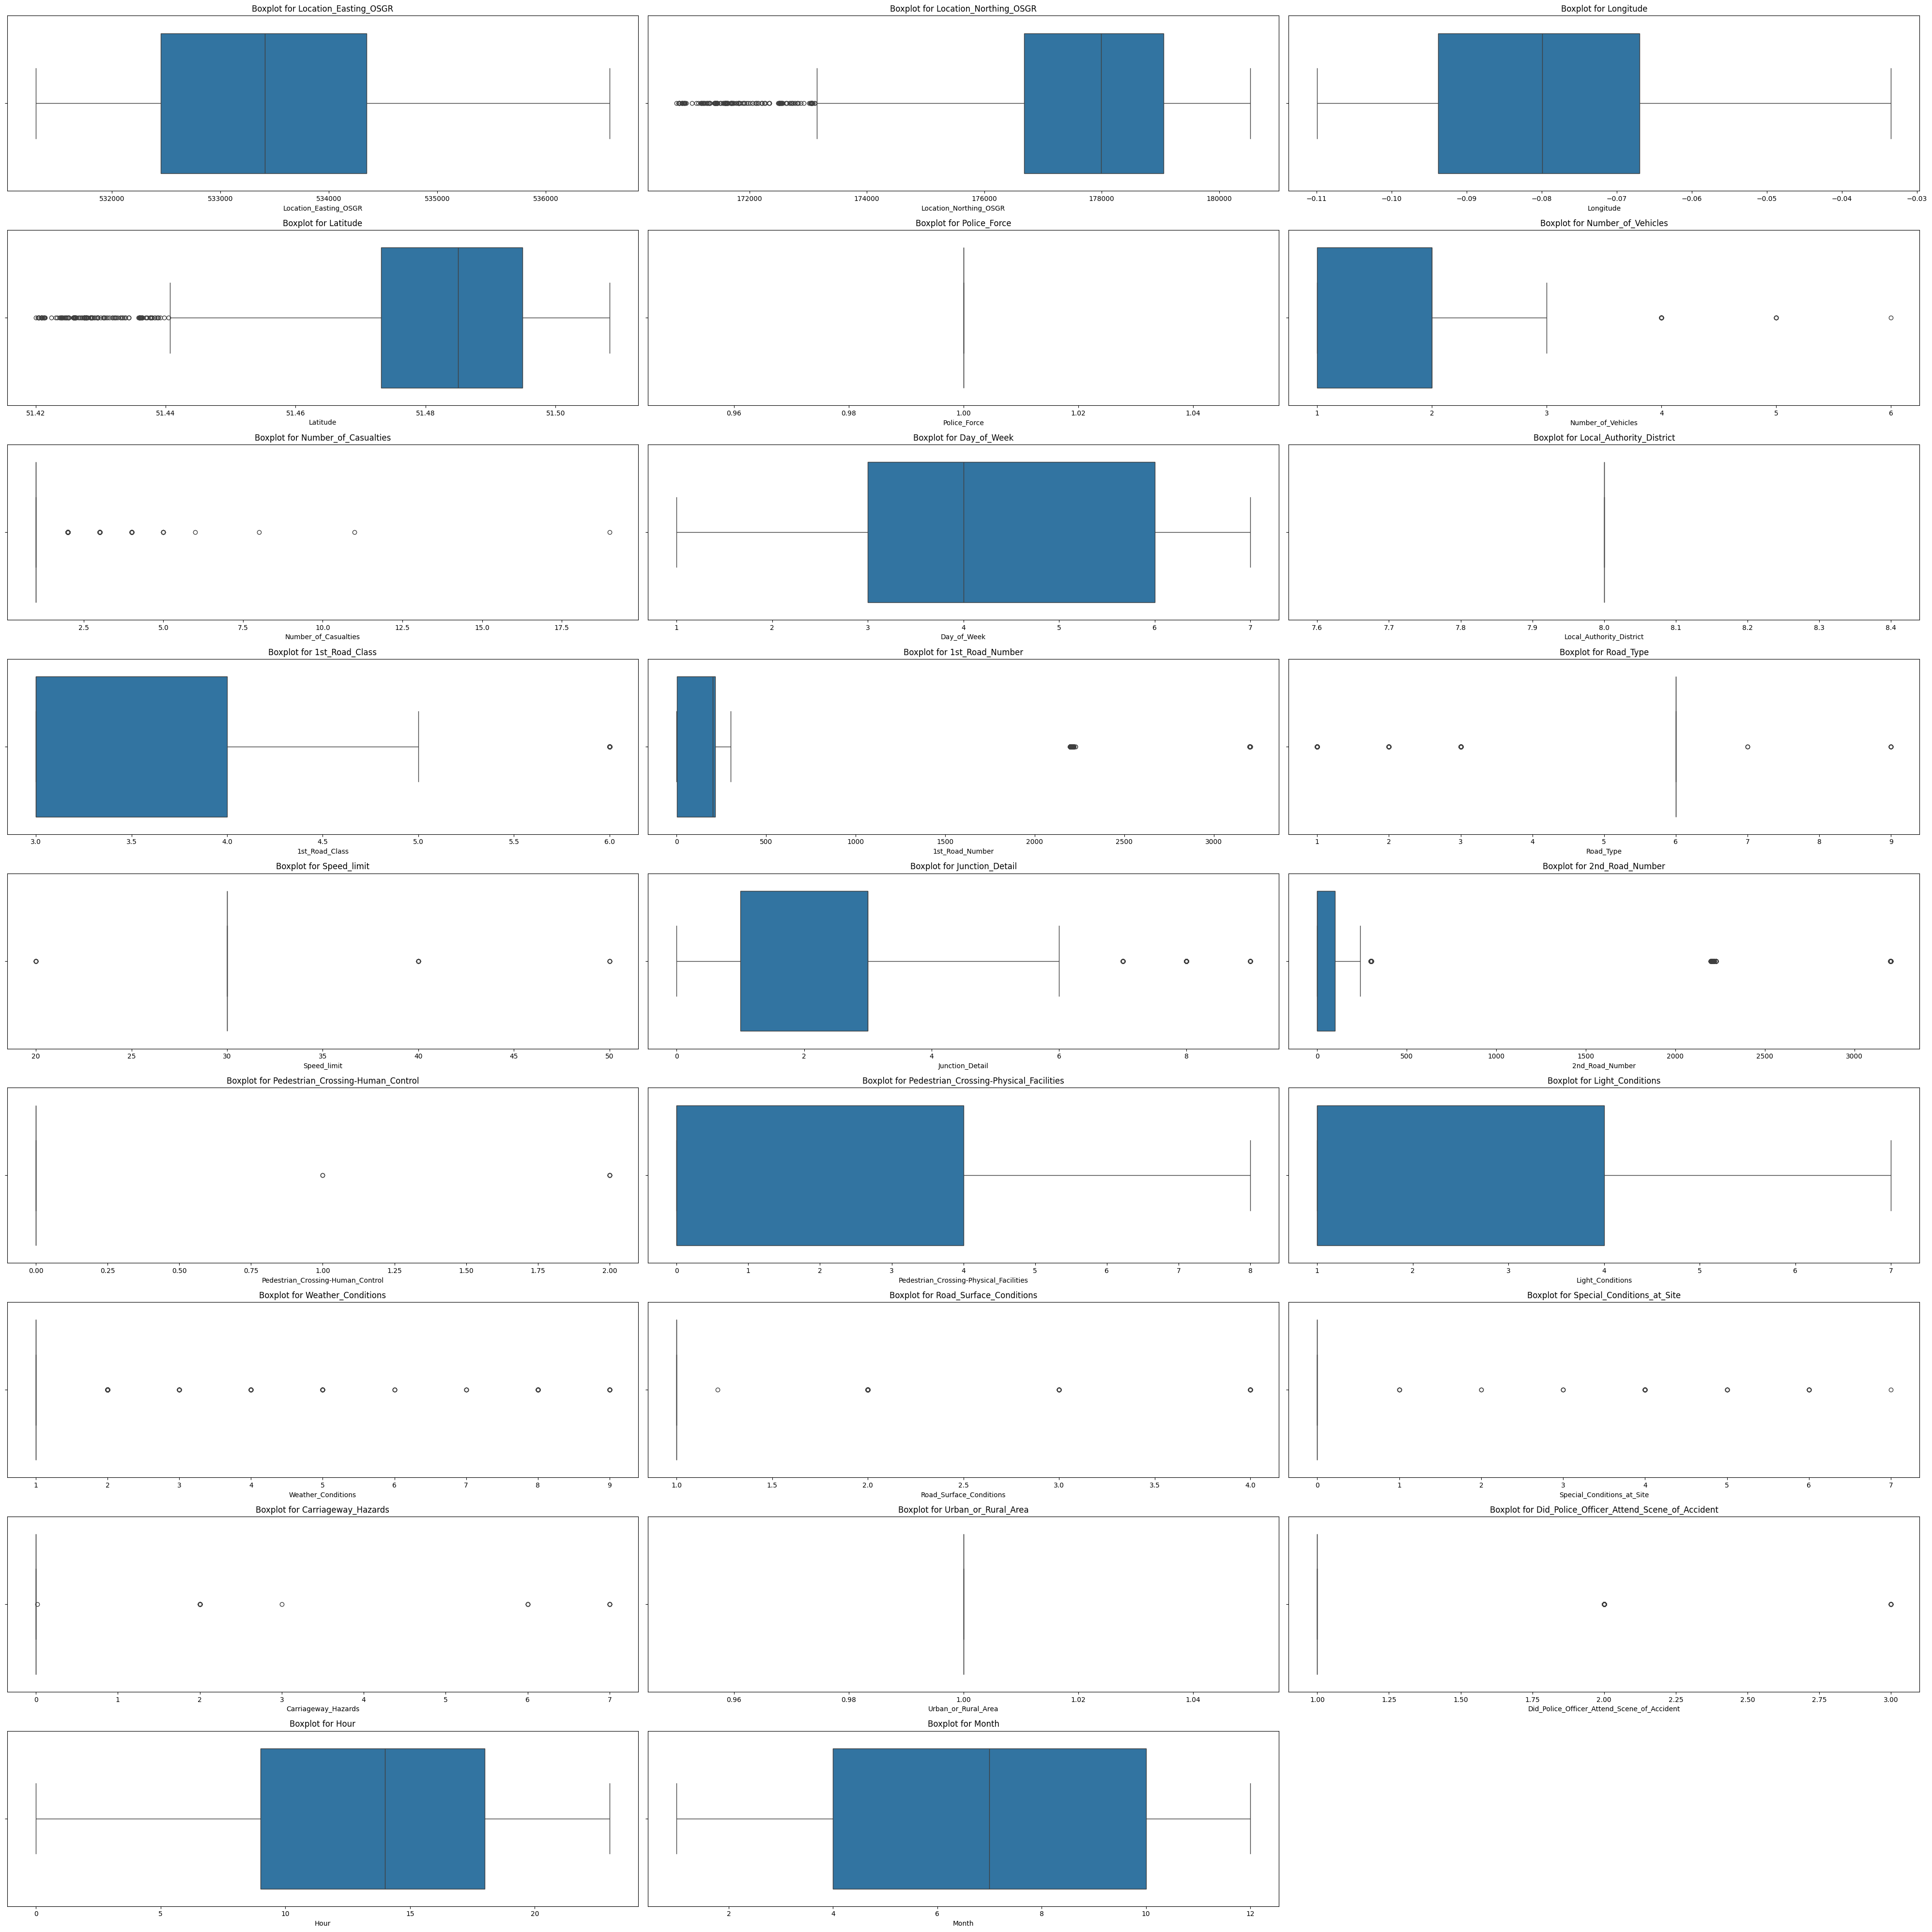

In [124]:
# Detecting outliers using IQR (Interquartile Range)
numeric_columns = numeric_columns.drop('Accident_Severity')
outliers_iqr = {}
for column in numeric_columns:
    Q1 = borough_data[column].quantile(0.25)
    Q3 = borough_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_iqr[column] = borough_data[(borough_data[column] < lower_bound) | (borough_data[column] > upper_bound)]

# Visualizing outliers using Boxplots
plt.figure(figsize=(40, 40))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns)//3 + 1, 3, i)  # Adjust layout based on the number of columns
    sns.boxplot(data=borough_data, x=column)
    plt.title(f'Boxplot for {column}')
    plt.tight_layout()

# Showing the plots
plt.show()

### Imputing Outliers 

In [127]:
# Defining a function to remove outliers based on IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Defining a function to impute outliers based on IQR
def impute_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Imputing with the median within the range
    df[column] = np.where(df[column] < lower_bound, df[column].median(), df[column])
    df[column] = np.where(df[column] > upper_bound, df[column].median(), df[column])
    return df

# Removing outliers based on IQR for each numeric column
df_no_outliers = borough_data.copy()
for column in numeric_columns:
    df_no_outliers = remove_outliers_iqr(df_no_outliers, column)

# Imputing outliers based on IQR for each numeric column
borough_data = borough_data.copy()
for column in numeric_columns:
    df_imputed = impute_outliers_iqr(borough_data, column)

# Checking the difference in the shapes of the dataframes
print(f"Original dataframe shape: {borough_data.shape}")
print(f"Dataframe after removing outliers: {df_no_outliers.shape}")
print(f"Dataframe after imputing outliers: {borough_data.shape}")

Original dataframe shape: (5982, 31)
Dataframe after removing outliers: (1651, 31)
Dataframe after imputing outliers: (5982, 31)


##### As there can be crealy seen that removing outliers will results in loss of vast amount of data that's why we decided to use the imputed data

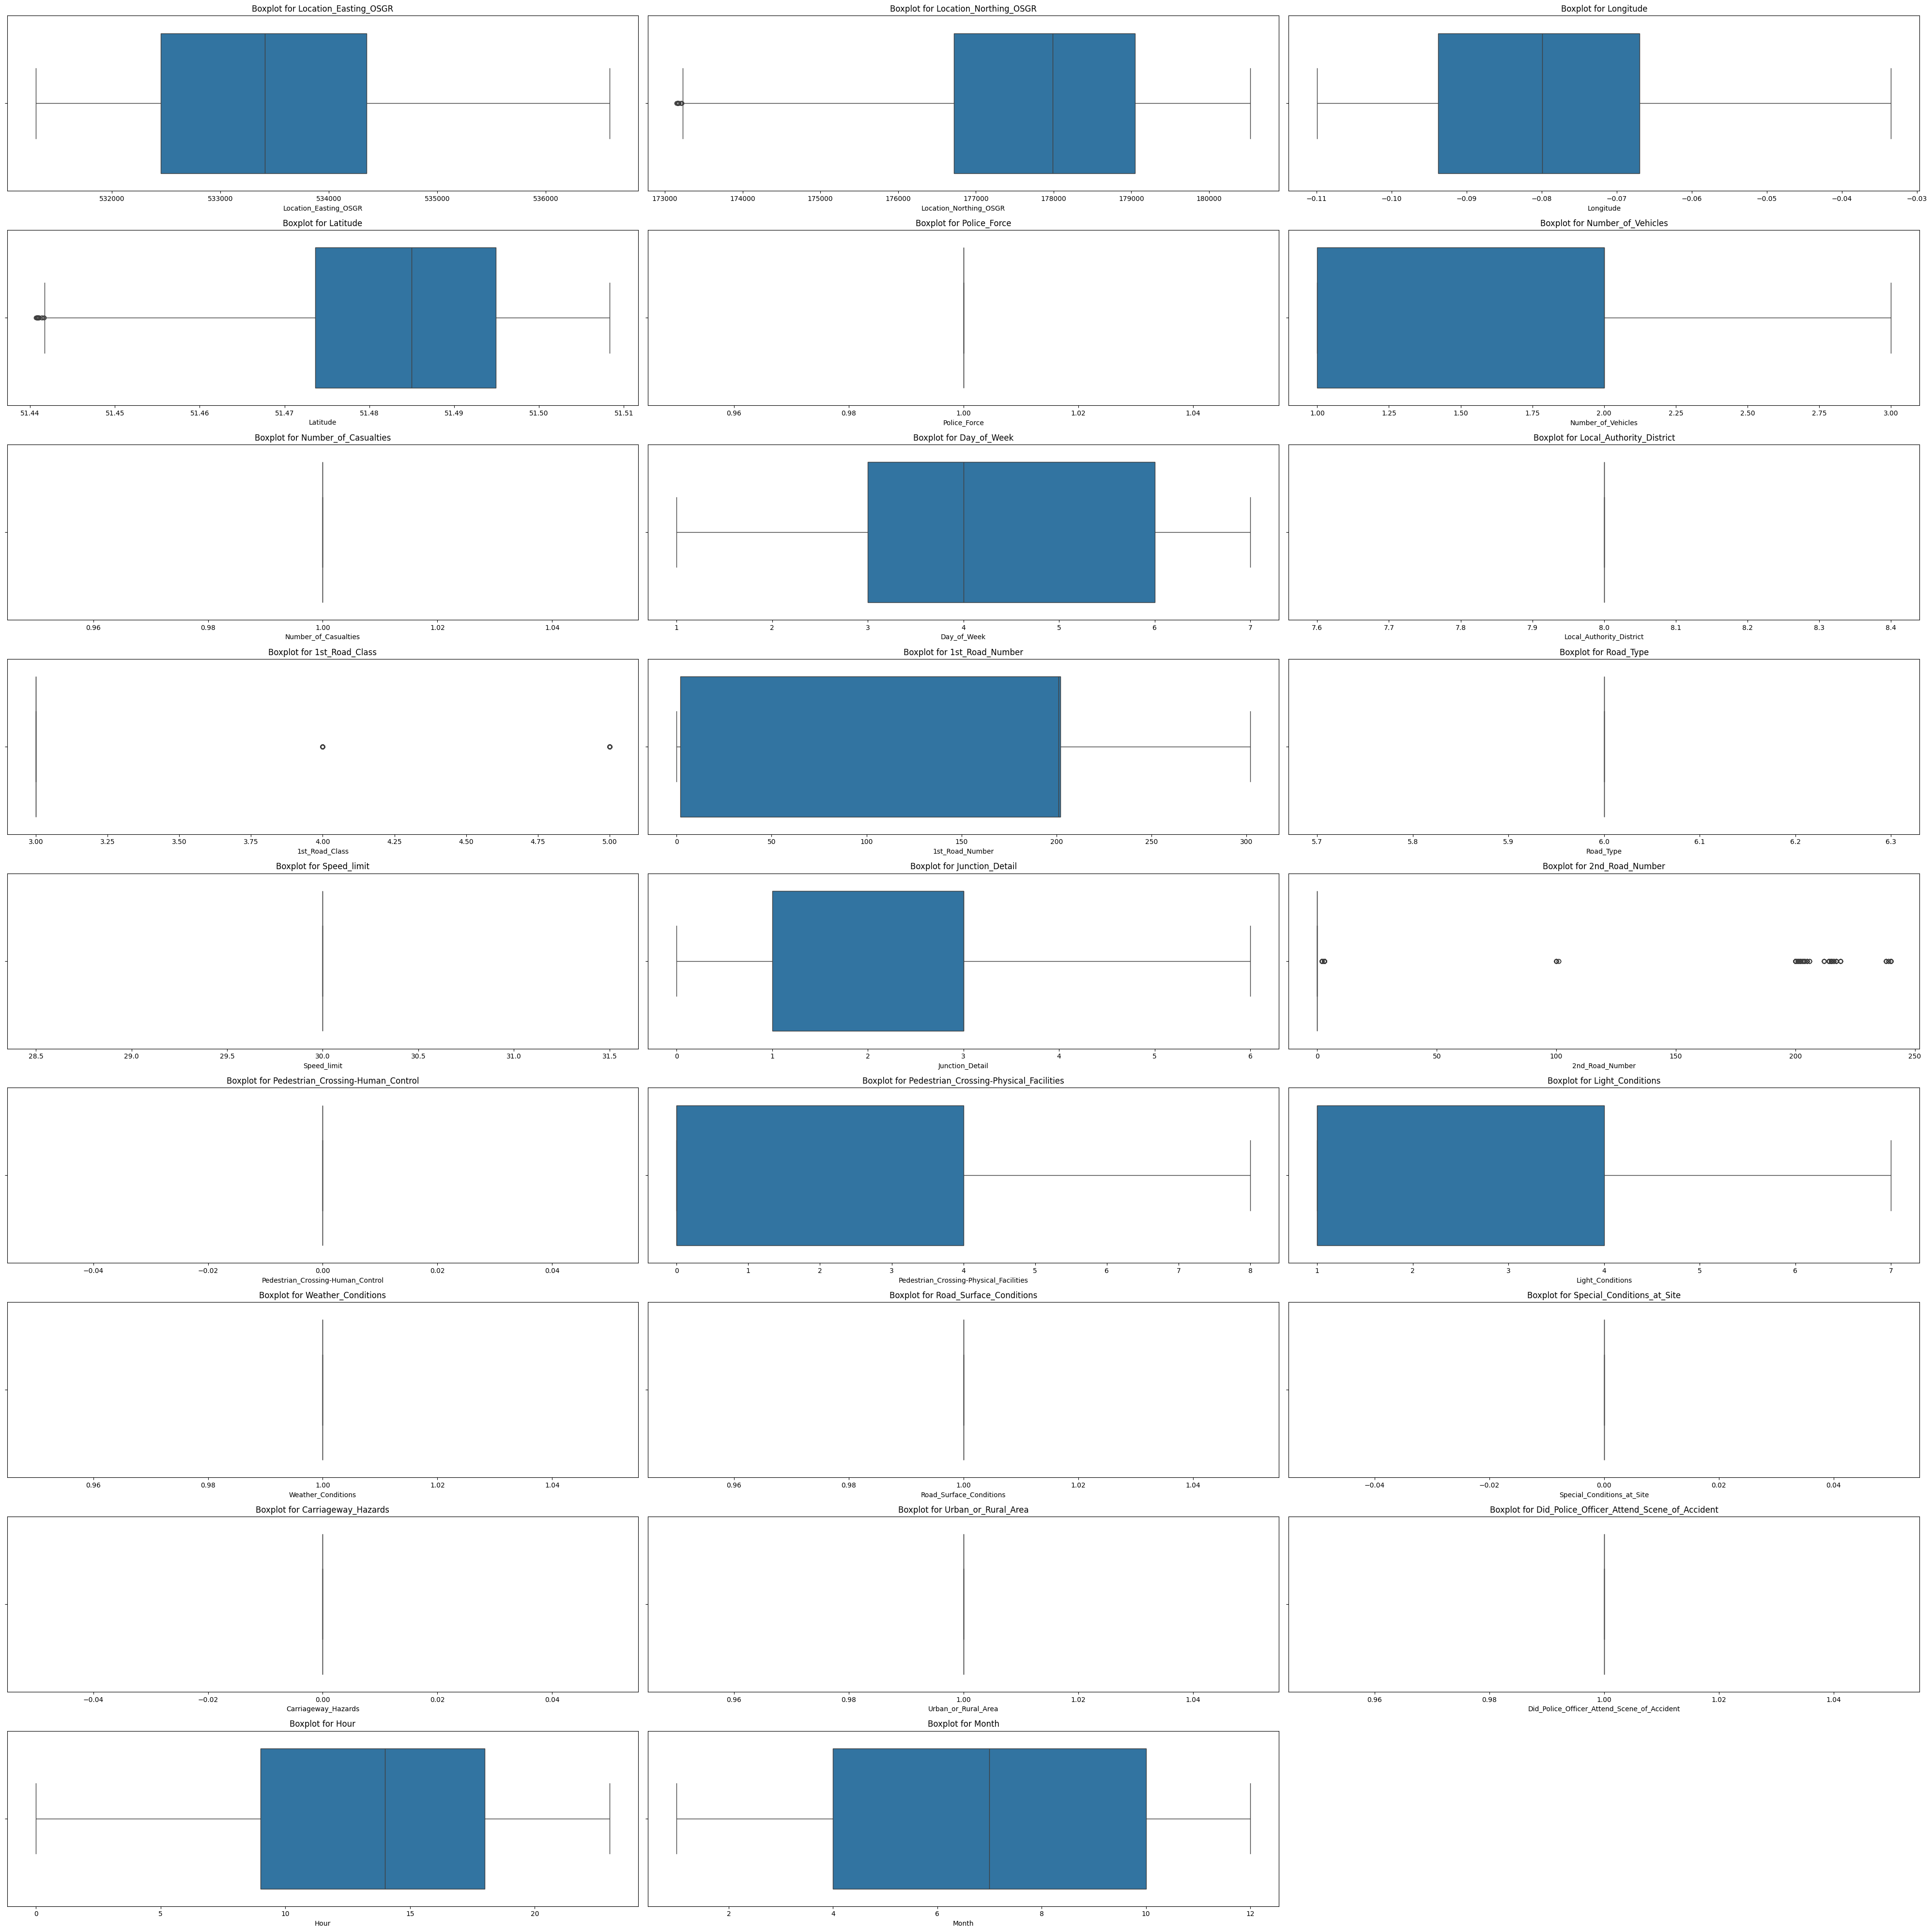

In [130]:
# Visualizing outliers using Boxplots
plt.figure(figsize=(40, 40))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns)//3 + 1, 3, i)  # Adjust layout based on the number of columns
    sns.boxplot(data=borough_data, x=column)
    plt.title(f'Boxplot for {column}')
    plt.tight_layout()

# Showing the plots
plt.show()

### Checking for outliers in Categorical columns

In [133]:
borough_data['LSOA_of_Accident_Location'].unique()

array(['E01004027', 'E01003934', 'E01003922', 'E01003165', 'E01003919',
       'E01003076', 'E01003067', 'E01003078', 'E01003933', 'E01003948',
       'E01003012', 'E01003108', 'E01003996', 'E01003921', 'E01003931',
       'E01004045', 'E01004051', 'E01003966', 'E01004015', 'E01003941',
       'E01004036', 'E01003994', 'E01003989', 'E01004048', 'E01003979',
       'E01003985', 'E01004072', 'E01003953', 'E01004067', 'E01003964',
       'E01004010', 'E01003924', 'E01004005', 'E01003969', 'E01003984',
       'E01004070', 'E01004050', 'E01003974', 'E01004033', 'E01004068',
       'E01004019', 'E01004002', 'E01004064', 'E01004003', 'E01003961',
       'E01003982', 'E01003986', 'E01003959', 'E01004062', 'E01004038',
       'E01003950', 'E01003914', 'E01003990',
       <bound method Series.mode of 869       E01004027
       2211      E01003934
       9895      E01003922
       9899      E01003165
       9972      E01003934
                   ...
       138099    E01003981
       138112    E01

##### Because it is an ID columns with 189 Unique values that's why we're unable to show the outliers of this column.

### Label Encoding

In [137]:
borough_data['LSOA_of_Accident_Location'] = borough_data['LSOA_of_Accident_Location'].astype(str)

Applying Label Encoding on LSOA_of_Accident_Location to make it numeric and to check it's correlation with other columns

In [140]:
# Initializing the label encoder
label_encoder = LabelEncoder()

borough_data['LSOA_of_Accident_Location'] = label_encoder.fit_transform(borough_data['LSOA_of_Accident_Location'])

In [142]:
borough_data.head(2).T

869   \
Location_Easting_OSGR                                   532770.0   
Location_Northing_OSGR                                  180310.0   
Longitude                                               -0.08833   
Latitude                                               51.506079   
Police_Force                                                 1.0   
Accident_Severity                                              3   
Number_of_Vehicles                                           2.0   
Number_of_Casualties                                         1.0   
Date                                         2005-06-30 00:00:00   
Day_of_Week                                                  5.0   
Time                                         1900-01-01 16:57:00   
Local_Authority_District                                     8.0   
1st_Road_Class                                               3.0   
1st_Road_Number                                              3.0   
Road_Type                                                    6.0   
Speed_limit                                                 30.0   
Junction_Detail                                              3.0   
2nd_Road_Number                                            200.0   
Pedestrian_Crossing-Human_Control                            0.0   
Pedestrian_Crossing-Physical_Facilities                      5.0   
Light_Conditions                                             1.0   
Weather_Conditions                                           1.0   
Road_Surface_Conditions                                      1.0   
Special_Conditions_at_Site                                   0.0   
Carriageway_Hazards                                          0.0   
Urban_or_Rural_Area                                          1.0   
Did_Police_Officer_Attend_Scene_of_Accident                  1.0   
LSOA_of_Accident_Location                                    141   
Hour                                                        16.0   
Severity_Label                                            Slight   
Month                                                        6.0   

                                                            2211  
Location_Easting_OSGR                                   531440.0  
Location_Northing_OSGR                                  180400.0  
Longitude                                              -0.107449  
Latitude                                               51.507198  
Police_Force                                                 1.0  
Accident_Severity                                              3  
Number_of_Vehicles                                           2.0  
Number_of_Casualties                                         1.0  
Date                                         2005-08-22 00:00:00  
Day_of_Week                                                  2.0  
Time                                         1900-01-01 09:10:00  
Local_Authority_District                                     8.0  
1st_Road_Class                                               3.0  
1st_Road_Number                                              0.0  
Road_Type                                                    6.0  
Speed_limit                                                 30.0  
Junction_Detail                                              0.0  
2nd_Road_Number                                              0.0  
Pedestrian_Crossing-Human_Control                            0.0  
Pedestrian_Crossing-Physical_Facilities                      0.0  
Light_Conditions                                             1.0  
Weather_Conditions                                           1.0  
Road_Surface_Conditions                                      1.0  
Special_Conditions_at_Site                                   0.0  
Carriageway_Hazards                                          0.0  
Urban_or_Rural_Area                                          1.0  
Did_Police_Officer_Attend_Scene_of_Accident                  1.0  
LSOA_of

### Pairwise Correlation

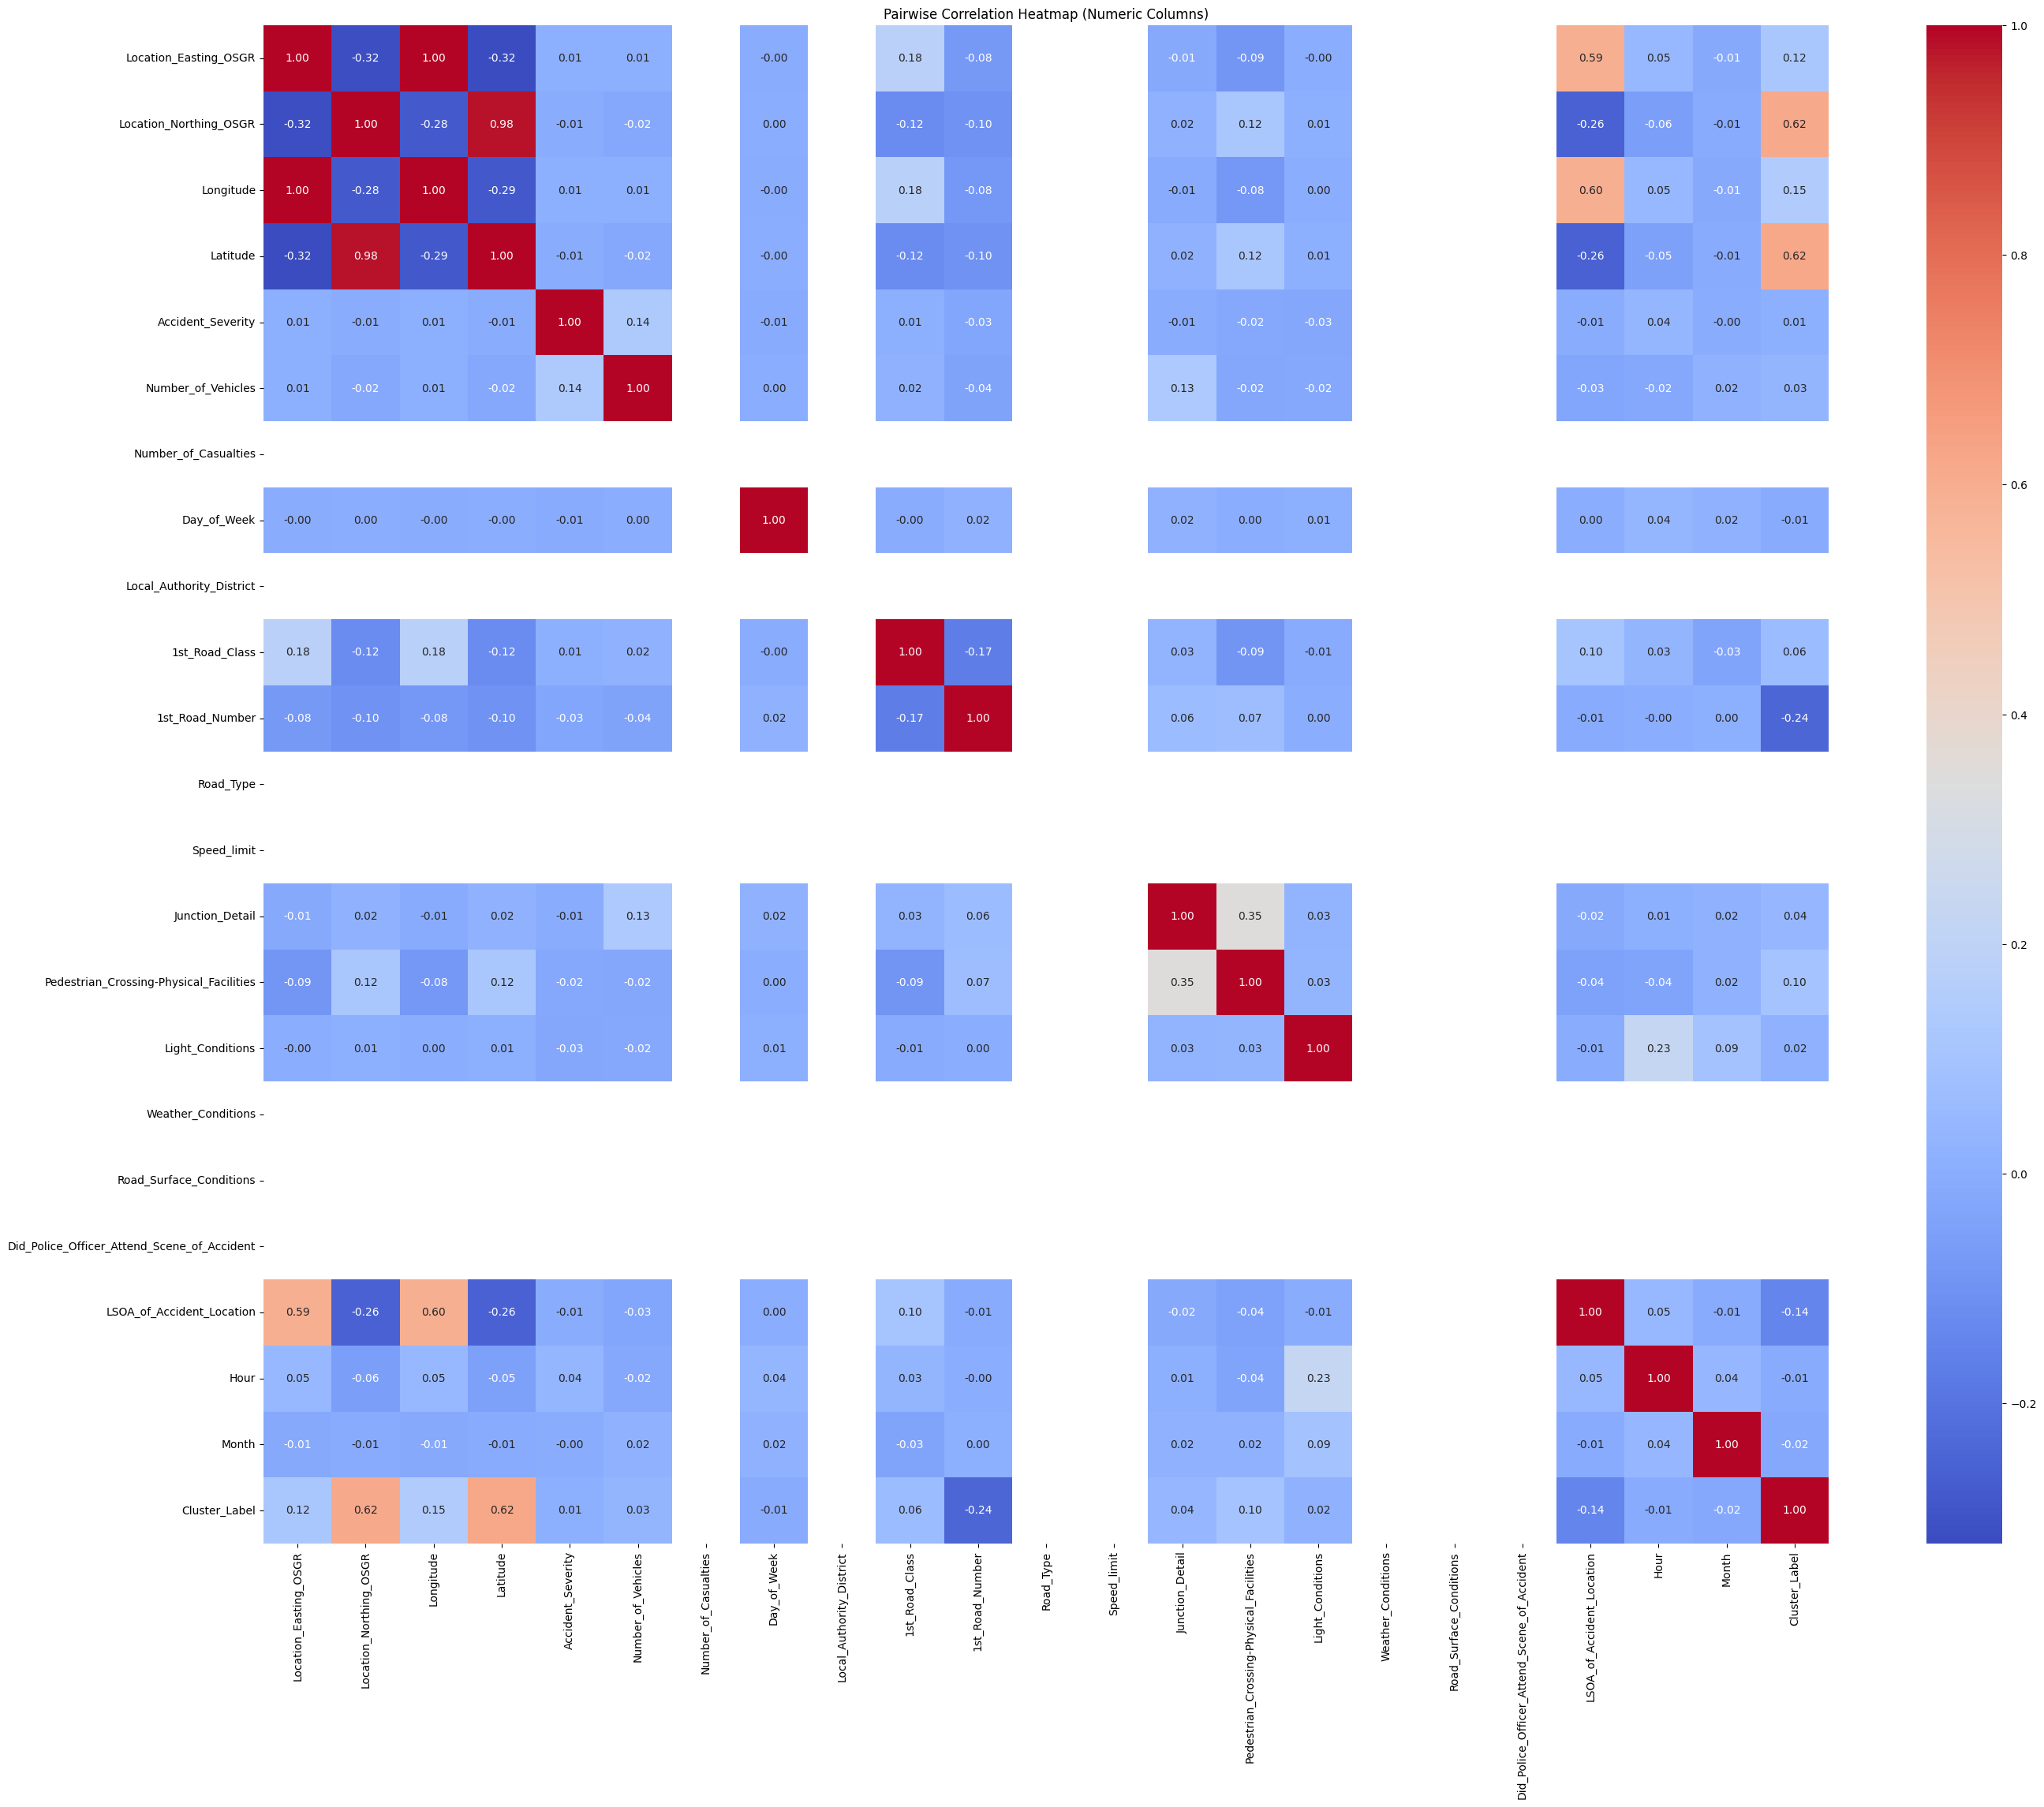

In [216]:
# Identifying numeric columns
numeric_columns = borough_data.select_dtypes(include=['number', 'float']).columns

# Computing the pairwise correlation matrix
correlation_matrix = borough_data[numeric_columns].corr()  # Default is Pearson correlation

# Displaying the correlation matrix as a heatmap
plt.figure(figsize=(32, 25))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Pairwise Correlation Heatmap (Numeric Columns)")
plt.show()

### Heatmap Analysis:

#### Purpose of the Heatmap:
The heatmap visualizes the pairwise Pearson correlation coefficients among the dataset's numeric columns. Correlation values range from -1 to 1, where values close to 1 (red) or -1 indicate strong positive or negative correlations, respectively, and values near 0 (blue) reflect little to no correlation.

#### Observations of Strong Correlations:
1. **Location_Easting_OSGR** and **Location_Northing_OSGR** exhibit a strong positive correlation (~1), likely due to their geographic nature.
2. **Number_of_Vehicles** and **Number_of_Casualties** demonstrate a moderate positive correlation, which is expected as accidents involving more vehicles may result in more casualties.
3. **1st_Road_Class** and **Road_Type** show moderate correlations, indicating a possible relationship in how road classifications impact accident circumstances.

#### Columns with Minimal Correlation:
Certain columns consistently show near-zero correlations with other features, suggesting limited relevance or variability:
- **Police_Force**, **Urban_or_Rural_Area**, **Special_Conditions_at_Site**, **Carriageway_Hazards**, and **Pedestrian_Crossing-Human_Control** exhibit almost no correlation with other columns.
- **2nd_Road_Number** and **Junction_Control** also appear to have limited meaningful relationships.

#### Recommendation for Feature Selection:
Columns with negligible correlation values, minimal variability, or redundancy may be considered for removal to simplify the dataset and reduce noise. These include:
- **Police_Force**
- **Urban_or_Rural_Area**
- **Special_Conditions_at_Site**
- **Carriageway_Hazards**
- **Pedestrian_Crossing-Human_Control**
- **Time**
- **Severity_Label**
- **Date**
- **2nd_Road_Number**

#### Conclusion:
Focusing on strongly correlated features will enhance model performance by retaining the most informative variables while removing those that add little predictive value.


### Removing Unneseccary columns

In [163]:
borough_data = borough_data.drop(['Police_Force', 'Urban_or_Rural_Area', 'Special_Conditions_at_Site',
                                  'Carriageway_Hazards', 'Pedestrian_Crossing-Human_Control', 
                                 '2nd_Road_Number', 'Time', 'Severity_Label', 'Date'], axis=1)

In [165]:
borough_data.head().T

869            2211  \
Location_Easting_OSGR                        532770.000000  531440.000000   
Location_Northing_OSGR                       180310.000000  180400.000000   
Longitude                                        -0.088330      -0.107449   
Latitude                                         51.506079      51.507198   
Accident_Severity                                 3.000000       3.000000   
Number_of_Vehicles                                2.000000       2.000000   
Number_of_Casualties                              1.000000       1.000000   
Day_of_Week                                       5.000000       2.000000   
Local_Authority_District                          8.000000       8.000000   
1st_Road_Class                                    3.000000       3.000000   
1st_Road_Number                                   3.000000       0.000000   
Road_Type                                         6.000000       6.000000   
Speed_limit                                      30.000000      30.000000   
Junction_Detail                                   3.000000       0.000000   
Pedestrian_Crossing-Physical_Facilities           5.000000       0.000000   
Light_Conditions                                  1.000000       1.000000   
Weather_Conditions                                1.000000       1.000000   
Road_Surface_Conditions                           1.000000       1.000000   
Did_Police_Officer_Attend_Scene_of_Accident       1.000000       1.000000   
LSOA_of_Accident_Location                       141.000000      48.000000   
Hour                                             16.000000       9.000000   
Month                                             6.000000       8.000000   

                                                      9895           9899  \
Location_Easting_OSGR                        532530.000000  532730.000000   
Location_Northing_OSGR                       176530.000000  177990.000000   
Longitude                                        -0.093204      -0.091736   
Latitude                                         51.472166      51.484992   
Accident_Severity                                 3.000000       3.000000   
Number_of_Vehicles                                1.000000       1.000000   
Number_of_Casualties                              1.000000       1.000000   
Day_of_Week                                       5.000000       3.000000   
Local_Authority_District                          8.000000       8.000000   
1st_Road_Class                                    3.000000       3.000000   
1st_Road_Number                                 215.000000     201.000000   
Road_Type                                         6.000000       6.000000   
Speed_limit                                      30.000000      30.000000   
Junction_Detail                                   0.000000       0.000000   
Pedestrian_Crossing-Physical_Facilities           0.000000       4.000000   
Light_Conditions                                  1.000000       4.000000   
Weather_Conditions                                1.000000       1.000000   
Road_Surface_Conditions                           1.000000       1.000000   
Did_Police_Officer_Attend_Scene_of_Accident       1.000000       1.000000   
LSOA_of_Accident_Location                        36.000000      16.000000   
Hour                                             15.000000      18.000000   
Month                                             1.000000       1.000000   

                                                      9972  
Location_Easting_OSGR                        531420.000000  
Location_Northing_OSGR                       180460.000000  
Longitude                                        -0.107715  
Latitude                                         51.507742  
Accident_Severity                                 3.000000  
Number_of_Vehicles                                2.000000  
Number_of_Casualties                              1.000000  
Day_of_Week           

In [167]:
borough_data.shape

(5982, 22)

### Dealing with Class Imbalancing

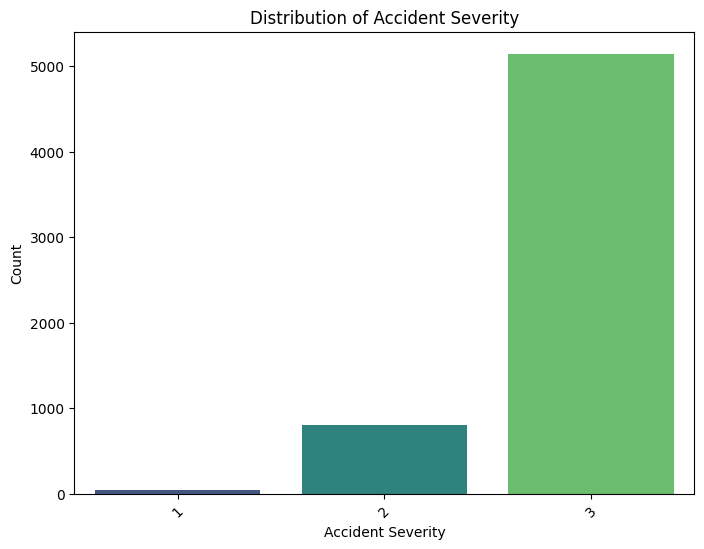

In [171]:
# Counting the occurrences of each value in 'Accident_Severity'
severity_counts = borough_data['Accident_Severity'].value_counts()

# Creating a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=severity_counts.index, y=severity_counts.values, palette='viridis')

# Adding labels and title
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.title('Distribution of Accident Severity')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability

# Showing the plot
plt.show()

In [173]:
# seperating features and target column
features = borough_data.drop(['Accident_Severity'], axis = 1)
target = borough_data['Accident_Severity']

In [175]:
# dealing with oversampling as our target class is imbalanced
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(features, target) 

In [177]:
y_resampled.value_counts()

3    5147
2    5147
1    5147
Name: Accident_Severity, dtype: int64

We have successfully dealt with Class imbalancing in our Target column

### Splitting Data into Traing and Testing

In [181]:
#splitting data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state= 42)

### Transforing Data

In [184]:
scaler = StandardScaler()

x_scale_train = scaler.fit_transform(x_train)
x_scale_test = scaler.transform(x_test)

# Data Modelling

### Applying Random Forest model

In [188]:
rf_model = RandomForestClassifier()
rf_model.fit(x_scale_train, y_train)
y_pred = rf_model.predict(x_scale_test)

#### Model Evaluation Function

In [191]:
# function for evaluation metrics precision, recall, f1 etc
def modelEvaluation(predictions, y_test_set, model_name):
    # Print model evaluation to predicted result
    print("==========",model_name,"==========")
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))
    print ("\nClassification report : \n", classification_report(y_test_set, predictions))
    print ("\nConfusion Matrix : \n")
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test_set, predictions), annot=True, fmt='g',cmap='viridis') #xticklabels =  [class_1, class_2], yticklabels =  [class_1, class_2, class_3, class_4])
    plt.tight_layout()
    plt.xlabel('predicted')
    plt.ylabel('Actual')
    plt.show()
    results = [accuracy_score(y_test_set, predictions), precision_score(y_test_set, predictions, average='macro'),
              recall_score(y_test_set, predictions, average='macro')]#,f1_score(y_test_set, predictions, average='macro')]
    return results

========== Random Forest ==========

Accuracy on validation set: 0.9492

Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1063
           2       0.96      0.88      0.92       978
           3       0.90      0.96      0.93      1048

    accuracy                           0.95      3089
   macro avg       0.95      0.95      0.95      3089
weighted avg       0.95      0.95      0.95      3089


Confusion Matrix : 



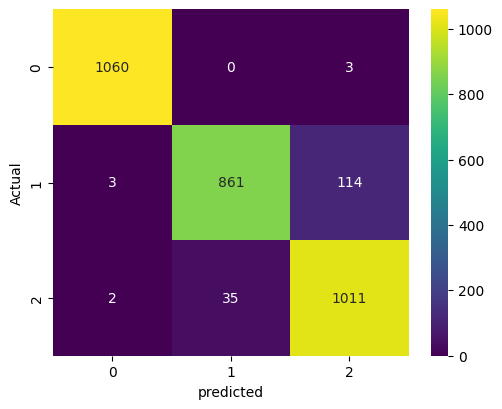

In [193]:
# for getting the results
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score


results_random_forest = modelEvaluation(y_pred, y_test, 'Random Forest')

## Applying K-means Clustering Model

### Scaling Data

Applying Scaling on Complete Data to apply K-means properly

In [198]:
from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()

scaler = StandardScaler()
df_scaled = scaler.fit_transform(borough_data)

### Using Elbow method to get optimal Clusters

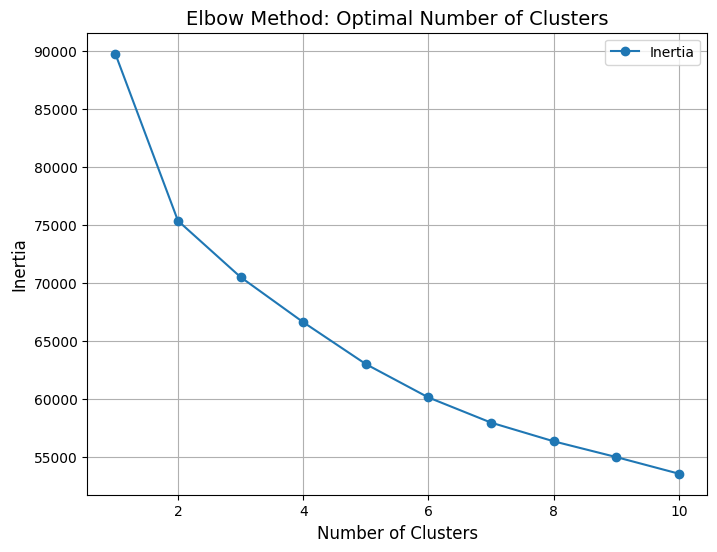

In [201]:
inertia = []
K_range = range(1, 11)  # Trying between 1 and 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Identifying the "elbow point" (for illustration, using k=3 as the elbow)
#optimal_k = 3  # Change this based on the visible "elbow" or programmatic detection

# Plotting the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker='o', label='Inertia')
#plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.title('Elbow Method: Optimal Number of Clusters', fontsize=14)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

#### Explanation:

- Initially, inertia decreases sharply as the number of clusters increases, indicating better clustering as more centroids are added.
- After a certain point, the rate of decrease slows down, forming an "elbow" shape. This is the point where adding more clusters provides diminishing returns.

#### Optimal Number of Clusters:

- The **elbow point** is the location where the curve transitions from steep to shallow. In this graph, the elbow appears around **3 clusters**, suggesting that 3 is the optimal number of clusters for this dataset.


### Applying K-Mean

In [203]:
# Based on the elbow method, the chosen the number of clusters 
optimal_k = 3

In [205]:
# Applying KMeans with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
borough_data['Cluster_Label'] = kmeans.fit_predict(df_scaled)

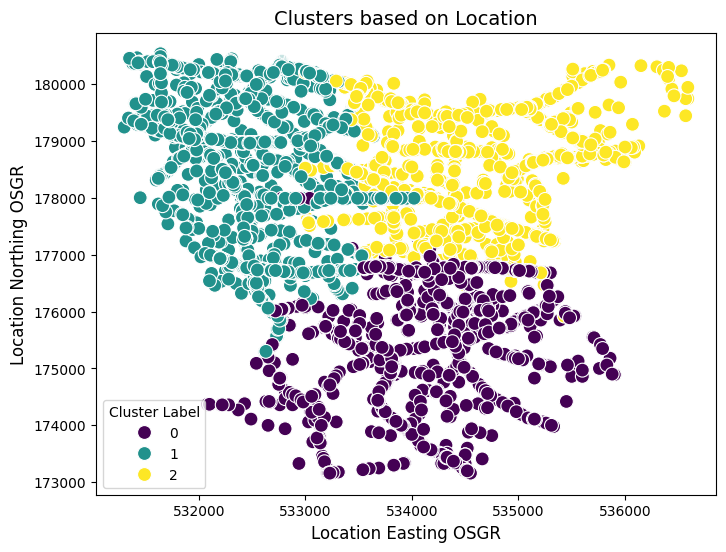

In [207]:
# Step 6: Visualizing the Clusters 
# Let's use the first two features for visualization, just as an example.
plt.figure(figsize=(8, 6))
sns.scatterplot(x=borough_data['Location_Easting_OSGR'], y=borough_data['Location_Northing_OSGR'], hue=borough_data['Cluster_Label'], palette='viridis', s=100)
plt.title('Clusters based on Location', fontsize=14)
plt.xlabel('Location Easting OSGR', fontsize=12)
plt.ylabel('Location Northing OSGR', fontsize=12)
plt.legend(title='Cluster Label')
plt.show()

### Evaluating Model

In [210]:
# Inertia
inertia = kmeans.inertia_
print(f'Inertia: {inertia}')

Inertia: 70488.93773142094


In [212]:
# Silhouette Score
sil_score = silhouette_score(df_scaled, borough_data['Cluster_Label'])
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.12774819292521875


In [214]:
# Davies-Bouldin Index
db_index = davies_bouldin_score(df_scaled, borough_data['Cluster_Label'])
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 2.4896823369557826
